<a href="https://colab.research.google.com/github/kpacker77/CSE158_Assign2/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# !pip uninstall -y numpy
# !pip install numpy==1.26.4

In [4]:
# !pip install scikit-surprise

In [5]:
# !pip install metric-learn

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_path="/content/drive/MyDrive/CSE158_Assignment2"

In [10]:
# change directory to the project folder
%cd $data_path
# sanity check this works
import os
print("Now working in:", os.getcwd())
!ls  # list files in the folder

/content/drive/MyDrive/CSE158_Assignment2
Now working in: /content/drive/MyDrive/CSE158_Assignment2
renttherunway_final_data.json.gz


In [11]:
import gzip
import json

In [12]:
RTR_path = "/content/drive/MyDrive/CSE158_Assignment2/renttherunway_final_data.json.gz"

### Dataset Context:

The RentTheRunway Clothing Fit dataset contains user–item interactions collected from the Rent the Runway clothing rental platform. When a customer rents an item (dress, gown, romper, etc.), they leave a review with numerical rating, textual review, details about the event, body measurements, reported fit, and the size they rented.

#### What is it for:

* Understand how clothing fits different body types.
* Predict user–item fit satisfaction.
* Enable outfit recommendation, size prediction, item similarity, etc.

### How it was collected:

* Logged from real user rental transactions.
* Includes >190k reviews from >100k users and >5k items.
* All reviews are voluntarily provided by customers.
* This dataset is widely used in research for recommender systems and apparel fit prediction.

In [13]:
data = []
with gzip.open(RTR_path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

print('There are',len(data), 'entries of type', type(data[0]))

There are 192544 entries of type <class 'dict'>


In [14]:
df = pd.DataFrame(data)
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


In [15]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
count,192544,192544,174133,192544,162562,192462,192534,192544,177907,192544,192544,191867,192544.000000,191584,192544
unique,3,105571,106,5850,190,5,9,191031,7,154740,68,24,NaN,89,2274
top,fit,691468,34b,126335,130lbs,10,wedding,.,hourglass,Stylist Review,dress,"5' 4""",NaN,31,"June 15, 2016"
freq,142058,436,27285,2241,14370,124537,57784,63,55349,977,92884,28012,NaN,14522,844
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.245175,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.494877,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN


Number of users: 105571
Number of items: 5850
Number of transactions: 192544


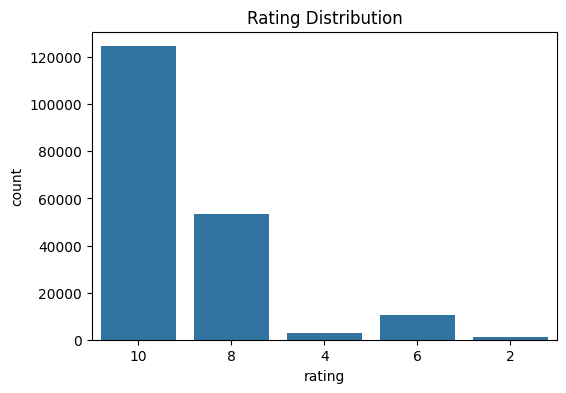

In [16]:
# -----------------------------
# Basic Statistics
# -----------------------------
print("Number of users:", df['user_id'].nunique())
print("Number of items:", df['item_id'].nunique())
print("Number of transactions:", len(df))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['rating'])
plt.title("Rating Distribution")
plt.show()

We see here that the rating scale is oddly 2-10 with an increment of two. The data is overwhelmingly skewed to the highest rating. This makes training a model on user ratings somwhat difficult. What is the cause of this?

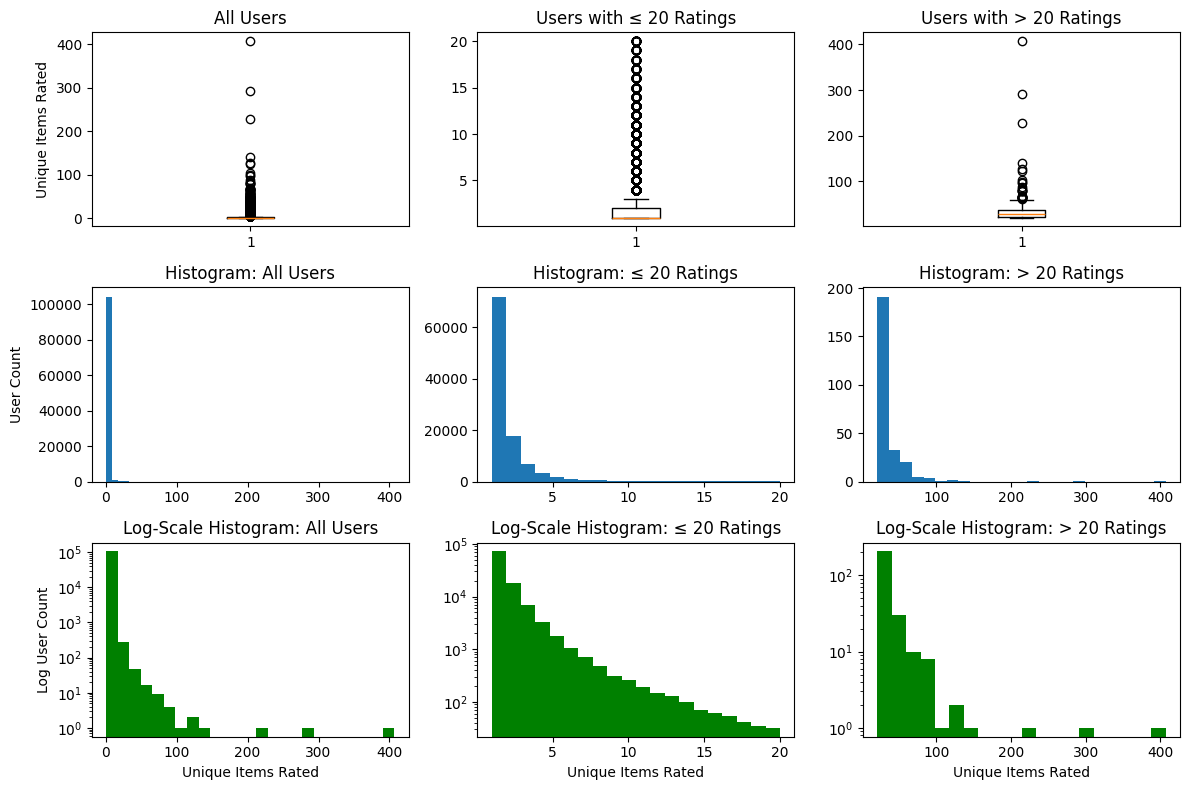

In [17]:
# Count unique items rated per user
user_item_counts = df.groupby("user_id")["item_id"].nunique()

# Define subsets
low = user_item_counts[user_item_counts <= 20]
high = user_item_counts[user_item_counts > 20]

# Set up 3 rows × 3 columns
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# ----------------------
# Row 1 — Boxplots
# ----------------------

# 1. All users
axes[0, 0].boxplot(user_item_counts, vert=True)
axes[0, 0].set_title("All Users")
axes[0, 0].set_ylabel("Unique Items Rated")

# 2. ≤ 20 ratings
axes[0, 1].boxplot(low, vert=True)
axes[0, 1].set_title("Users with ≤ 20 Ratings")

# 3. > 20 ratings
axes[0, 2].boxplot(high, vert=True)
axes[0, 2].set_title("Users with > 20 Ratings")

# ----------------------
# Row 2 — Normal Histograms
# ----------------------

axes[1, 0].hist(user_item_counts, bins=50)
axes[1, 0].set_title("Histogram: All Users")
axes[1, 0].set_ylabel("User Count")

axes[1, 1].hist(low, bins=20)
axes[1, 1].set_title("Histogram: ≤ 20 Ratings")

axes[1, 2].hist(high, bins=25)
axes[1, 2].set_title("Histogram: > 20 Ratings")

# ----------------------
# Row 3 — Log-Scaled Histograms
# ----------------------

axes[2, 0].hist(user_item_counts, bins=25, color='green')
axes[2, 0].set_yscale("log")
axes[2, 0].set_title("Log-Scale Histogram: All Users")
axes[2, 0].set_xlabel("Unique Items Rated")
axes[2, 0].set_ylabel("Log User Count")

axes[2, 1].hist(low, bins=20, color='green')
axes[2, 1].set_yscale("log")
axes[2, 1].set_title("Log-Scale Histogram: ≤ 20 Ratings")
axes[2, 1].set_xlabel("Unique Items Rated")

axes[2, 2].hist(high, bins=20, color='green')
axes[2, 2].set_yscale("log")
axes[2, 2].set_title("Log-Scale Histogram: > 20 Ratings")
axes[2, 2].set_xlabel("Unique Items Rated")

plt.tight_layout()
plt.show()

In [18]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
#Let's normalize rating from 2-10 to 1-5
df['rating'] = df['rating']/2

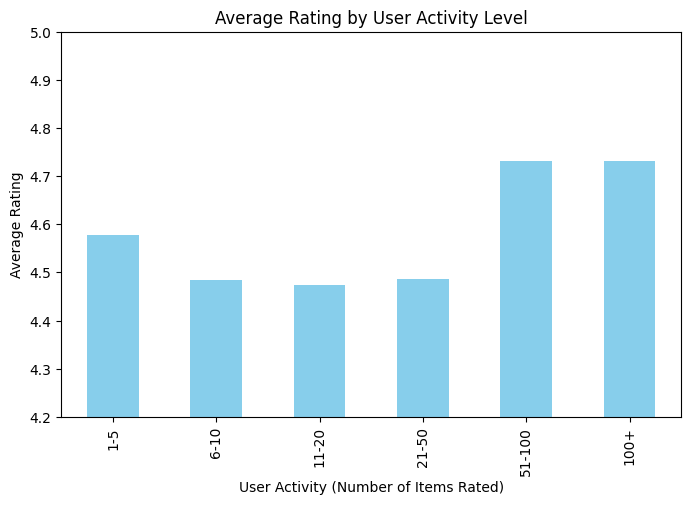

In [19]:
# Step 1: Compute per-user stats
user_stats = df.groupby("user_id").agg(
    num_items_rated=("item_id", "nunique"),
    avg_rating=("rating", "mean"))

# Step 2: Define bins for number of items rated
bins = [0, 5, 10, 20, 50, 100, np.inf]  # customize as needed
labels = ["1-5", "6-10", "11-20", "21-50", "51-100", "100+"]

user_stats["activity_bin"] = pd.cut(user_stats["num_items_rated"],
                                    bins=bins, labels=labels, right=True)

# Step 3: Compute average rating per bin
avg_rating_per_bin = user_stats.groupby("activity_bin")["avg_rating"].mean()

# Step 4: Plot as a bar chart
plt.figure(figsize=(8,5))
avg_rating_per_bin.plot(kind="bar", color="skyblue")
plt.xlabel("User Activity (Number of Items Rated)")
plt.ylabel("Average Rating")
plt.title("Average Rating by User Activity Level")

# Zoom in on y-axis
plt.ylim(4.2, 5)

plt.show()

First, let's look at our missing values.

In [20]:
#Look at each category's count of null values
df.isna().sum().sort_values(ascending=False)

,0
weight,29982
bust size,18411
body type,14637
age,960
height,677
rating,82
rented for,10
fit,0
user_id,0
item_id,0


Looking at missing data, data in the wrong format, and possibly skewed data, we will need to first *clean* the data so that our model is running accurately.

Noticing that height is provided as 5'8", we should break this down into clearer and cleaner format for our recommender systems. We will convert this into inches.

In [21]:
def h_to_in(h):
    if pd.isna(h):
        return np.nan
    # height is currently "5' 8\"" -> split on the apostrophe
    feet, inches = h.split("'")
    feet = int(feet.strip())
    inches = int(inches.replace('"', '').strip())
    return feet * 12 + inches #make conversion to inches

In [22]:
# Let's clean up some of the data
df['age'] = pd.to_numeric(df['age'], errors='coerce') #age to numeric type
df['height'] = df['height'].apply(h_to_in)

In [23]:
# We should figure a clever way to impute weight
# First we need to remove lbs out of each weight category and make it numeric

# Remove 'lbs' and convert to numeric
df['weight'] = df['weight'].str.replace('lbs', '', regex=False)  # remove the string 'lbs'
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')     # convert to float

In [24]:
"""
Group people by body type, height, and size. For each missing value in each
group, impute with the median.
"""
df['weight'] = df.groupby(['size', 'height', 'body type'])['weight'].transform(
    lambda x: x.fillna(x.median())
)
"""
Some groups had missing body type categories, so now we group by only height and
size. Then fill NaN with the median of those categories.
"""
df['weight'] = df.groupby(['size', 'height'])['weight'].transform(
    lambda x: x.fillna(x.median())
)

"""
There were still some missing values as height wasn't provided. However, all
entries provided size, so group by size and fill NaN with the median of each
size category.
"""
df['weight'] = df.groupby('size')['weight'].transform(
    lambda x: x.fillna(x.median())
    )

Now that every user has a weight, which is representative of other users with similar characteristics, we can look at the weight distribution.

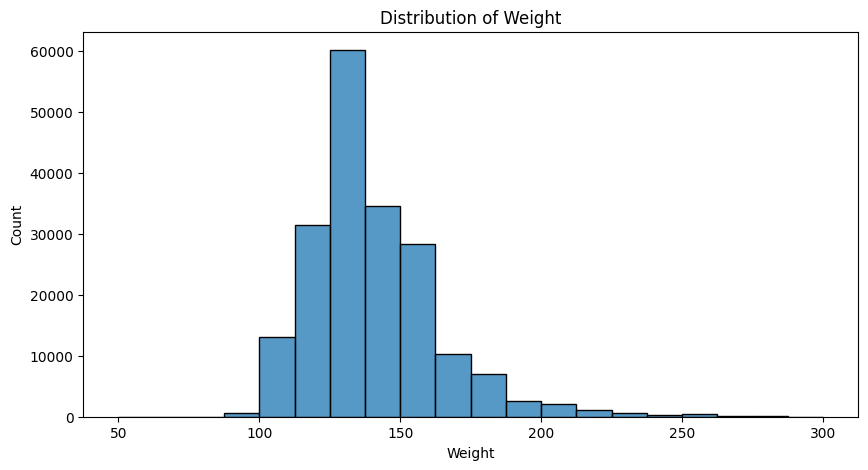

In [25]:
#Lets look at the weight distribution
plt.figure(figsize=(10,5))
sns.histplot(df['weight'].sort_values(), bins=20, kde=False)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

Next, let's look at sizing. The sizing seems to vary quite largely. This is likely due to a number of factors that we would need to confirm with the vendor (i.e. mix of US, EU, UK, etc. clothing sizes; some item categories are measured differently shirt: S/M/L while pants: 30/32/34/36).

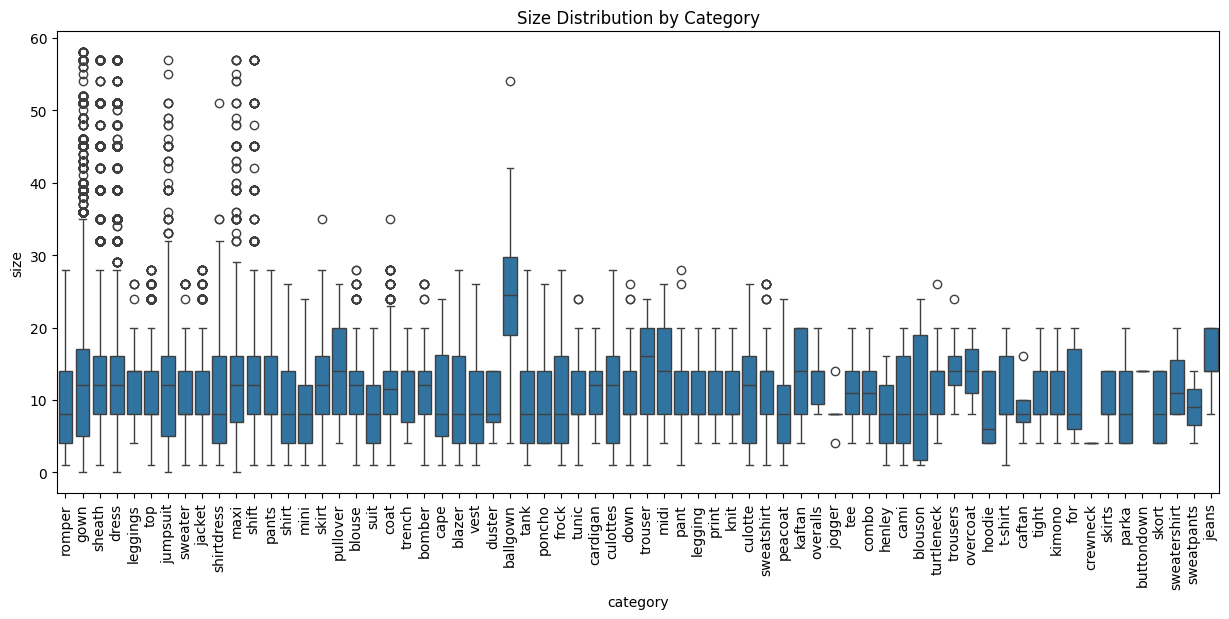

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x='category', y='size', data=df)
plt.xticks(rotation=90)
plt.title('Size Distribution by Category')
plt.show()

We can see that there are some issues with sizing, likely due to European, UK, and US sizing differences. This only applies to a few categories. We can try to normalize these.

In [27]:
convert_categories = ['ballgown','shift','gown', 'dress', 'sheath', 'jumpsuit', 'maxi', 'pants']

In [28]:
# EU -> US mapping for numeric sizes
eu_to_us = {
    30:0, 32:1, 34:2, 36:4, 38:6, 40:8, 42:10, 44:12, 46:14,
    48:16, 50:18, 52:20, 54:22
}

# Apply EU→US conversion only for selected categories
def convert_size(row):
    if row['category'] in convert_categories:
        return eu_to_us.get(row['size'], row['size'])
    return row['size']

df['size_normalized'] = df.apply(convert_size, axis=1)

In [29]:
df = df.drop(columns=['size']).rename(columns={'size_normalized': 'size'})

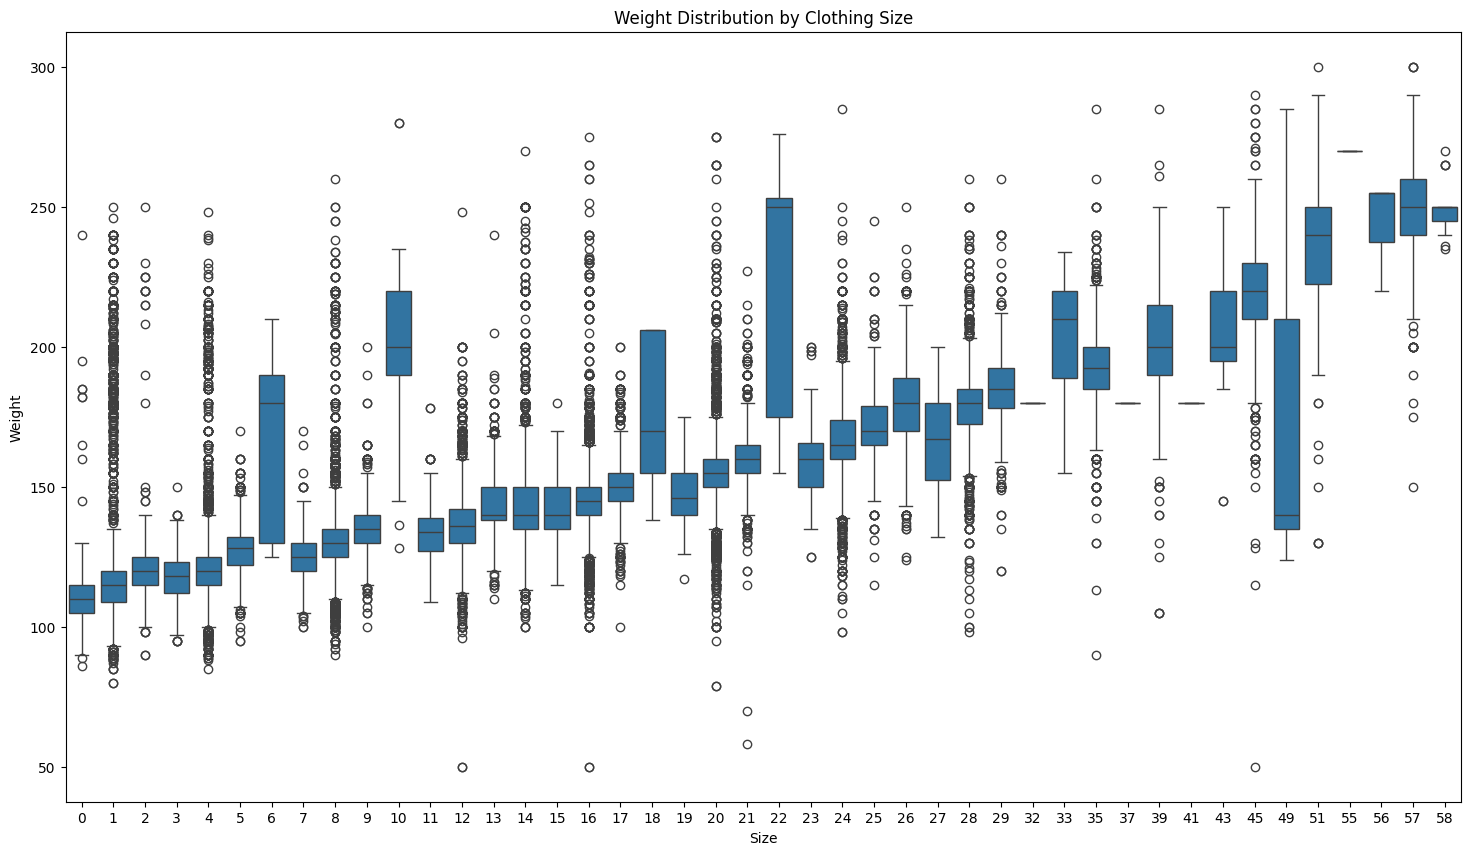

In [30]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='size', y='weight', data=df)
plt.title("Weight Distribution by Clothing Size")
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

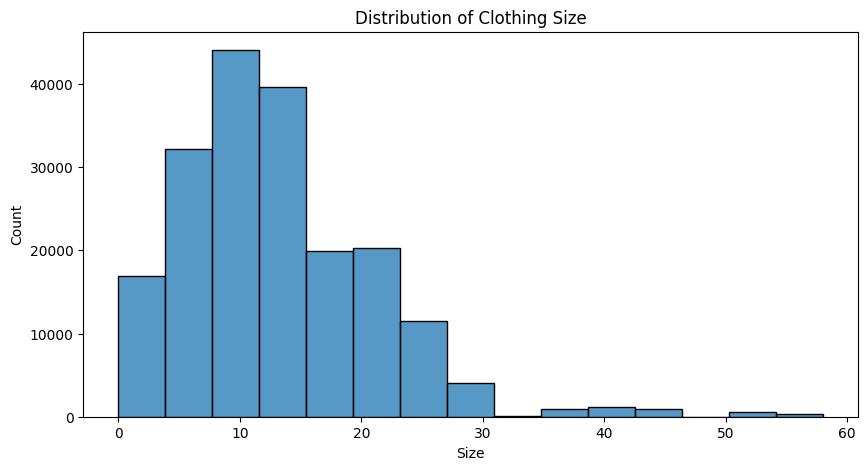

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['size'].sort_values(), bins=15, kde=False)
plt.title("Distribution of Clothing Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()

In [32]:
"""
Bust size is also often left unmarked and could be a strong indicator if a user
would prefer an item from another user of a similar build. We can separate bust
into the cup and the band size. Band size is a measurement of the rib cage and could
align better with weight, height, and overall clothing size.
"""
# Extract numeric band
df['bust_band'] = df['bust size'].str.extract(r'(\d+)').astype(float)

# Extract cup letters (including extended like DDD/E, +, etc.)
df['bust_cup'] = df['bust size'].str.extract(r'([a-zA-Z\+\-/]+)')

In [33]:
# Most restrictive group
df['bust_cup'] = df.groupby(['size', 'weight', 'bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Less restrictive group
df['bust_cup'] = df.groupby(['bust_band', 'weight'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Broadest group
df['bust_cup'] = df.groupby(['bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bustcup_mode = df['bust_cup'].mode()[0]
df['bust_cup'] = df['bust_cup'].replace('unkown', global_bustcup_mode)

In [34]:
# Filter band size
# Below 30 and above 42 are deemed outliers
df = df[df['bust_band'].between(30, 42)]

# Filter out entries with cup size h,i, and j
valid_cups = set(['aa','a','b','c','d','d+','dd','ddd/e','f','g'])
df = df[df['bust_cup'].str.lower().isin(valid_cups)]

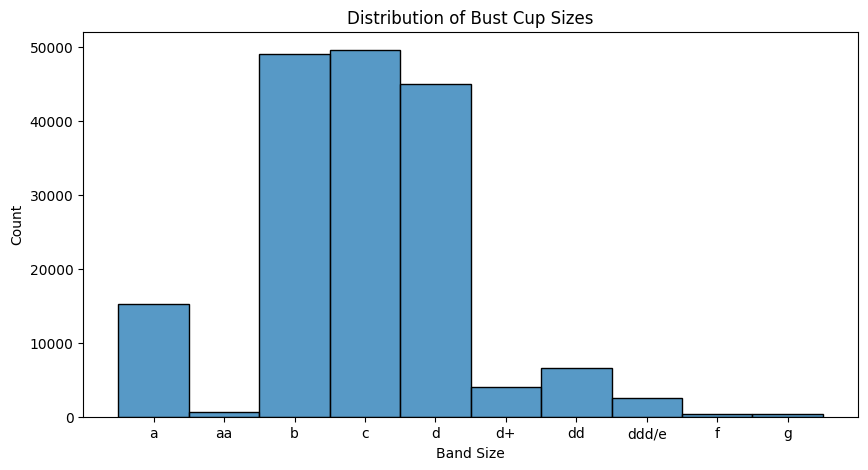

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_cup'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Cup Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

In [36]:
df['bust_band'] = df.groupby(['size', 'weight', 'height'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size', 'weight'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df['bust_band'].fillna(df['bust_band'].median())

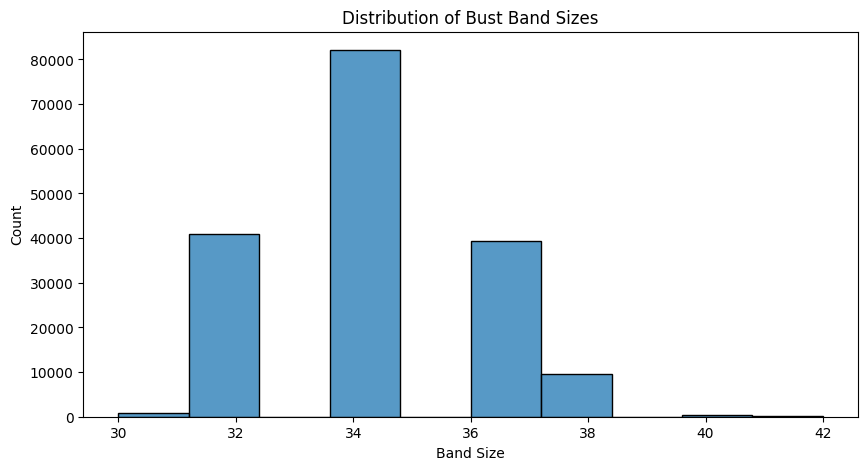

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_band'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Band Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

In [38]:
df.isna().sum().sort_values(ascending=False)

,0
body type,8486
age,913
height,546
rating,68
rented for,7
category,0
bust_band,0
size,0
review_date,0
fit,0


In [39]:
df = df.drop(columns=['bust size'])

In [40]:
df['category'].unique()

array(['romper', 'gown', 'dress', 'sheath', 'leggings', 'top', 'sweater',
       'jacket', 'shirtdress', 'jumpsuit', 'maxi', 'shift', 'shirt',
       'mini', 'skirt', 'pants', 'blouse', 'suit', 'coat', 'trench',
       'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown', 'tank',
       'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'pullover', 'turtleneck',
       'trousers', 'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight',
       'kimono', 'for', 'crewneck', 'skirts', 'parka', 'buttondown',
       'skort', 'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

Right off the bat, we see the are likely erroneous/non-clothing entries like **'for', 'combo', 'print'**. There are also duplicates and misspellings like **legging** and **leggings**.

In [41]:
# List of invalid categories
invalid_categories = ['for', 'print', 'combo']

# Keep only rows where 'category' is NOT in the invalid list
df = df[~df['category'].isin(invalid_categories)]

#Combine categories that are likely duplicates
df['category'] = df['category'].replace({
    'pant': 'pants',
    'legging': 'leggings',
    'skirts': 'skirt',
    't-shirt': 'tee',
    'culotte': 'culottes',
    'sweatershirt': 'sweatshirt'
})

In [42]:
df['body type'] = df.groupby(['size', 'bust_band','height'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size', 'bust_band'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bodytype_mode = df['body type'].mode()[0]
df['body type'] = df['body type'].replace('unknown', global_bodytype_mode)

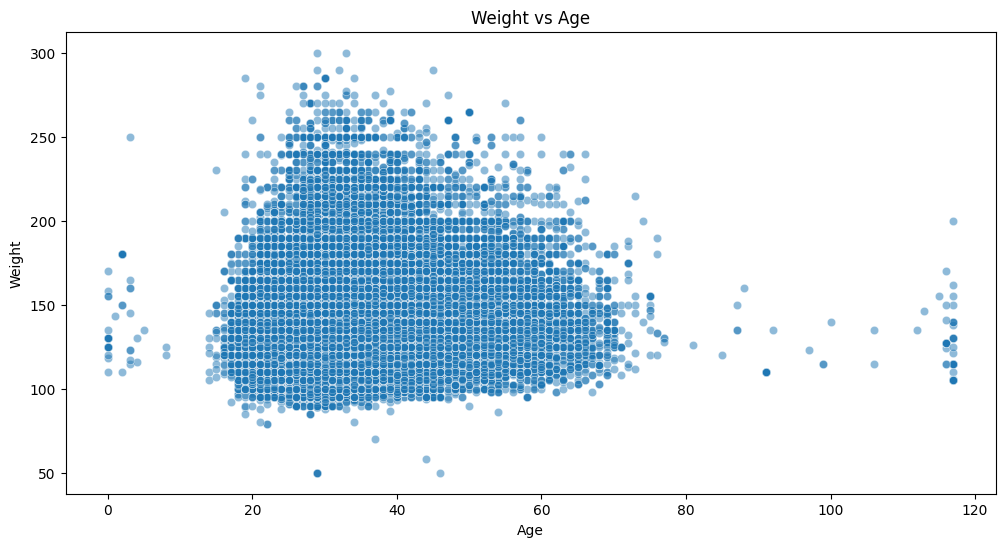

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='weight', data=df, alpha=0.5)
plt.title("Weight vs Age")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

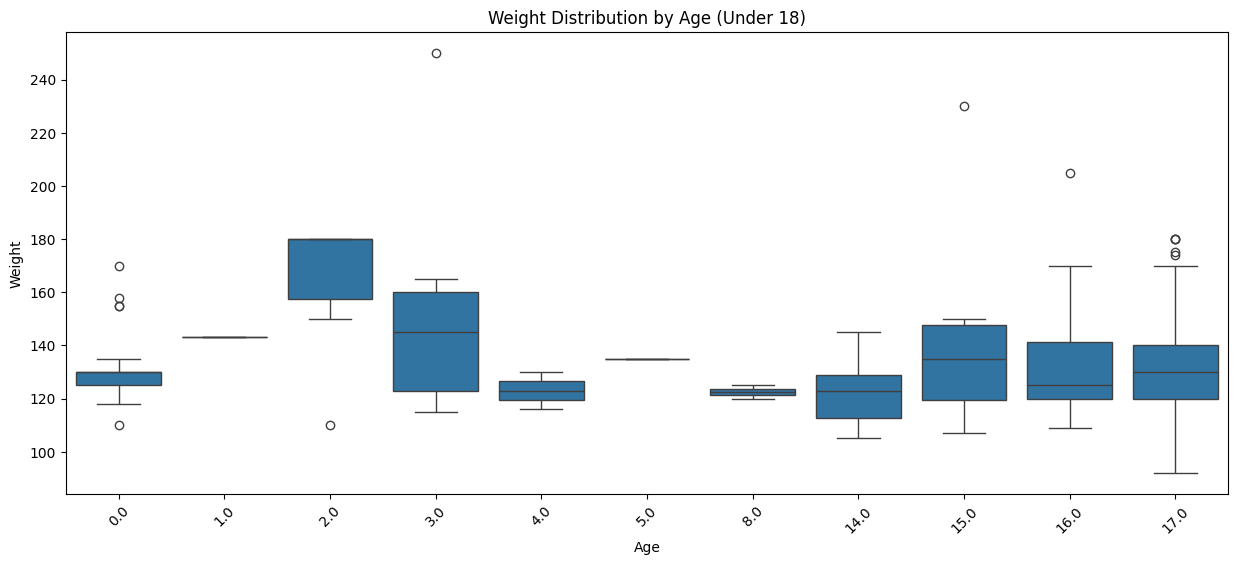

In [44]:
# Filter for ages less than 18
df_under18 = df[df['age'] < 18]

plt.figure(figsize=(15, 6))
sns.boxplot(x='age', y='weight', data=df_under18)
plt.title("Weight Distribution by Age (Under 18)")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

Looking at weight distributions for ages less than 18, there are some intersting discoveries. There's a jump between 8 and 14. Ages 8 and less all have a minimum weight of more than 110 pounds, which seems unlikely. This is most likely erroneous data. Let's find out what percentage of the data is age < 10.


In [45]:
(df['age'] < 10).sum()/df.shape[0] *100

0.027101052328095718

In [46]:
"""
Entries with age missing are less than 1% of the total data. Imputing with median or mode
only adds inaccuracy rather than making the data more robust for training. There does not appear
to be a better way to deal with the missing data, so recommend dropping missing
age values.
"""
df = df[df['age'].notna()]

In [47]:
# Keep only entries with 14 <= age <= 80
df = df[(df['age'] >= 14) & (df['age'] <= 80)]

<Axes: >

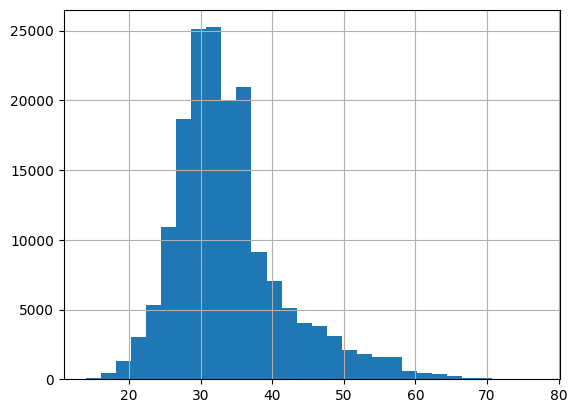

In [48]:
df['age'].hist(bins=30)

In [49]:
"""
Height is also difficult to impute since size, weight, body type, and bust are more
correlated with width rather than vertical height. With less than 1% height entries missing
recommend dropping the rest.
"""
df = df[df['height'].notna()]

<Axes: >

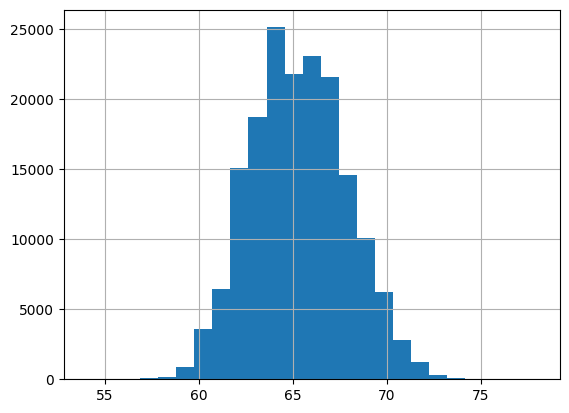

In [50]:
df['height'].hist(bins=25)

In [51]:
"""
We should also drop the remaining missing entries for rating (81) and 'rented for'.
The missing entries are inconsequential to the overall dataset. Same goes
for 'rented for' missing values.
"""
df = df.dropna(subset=['rating', 'rented for'])

In [52]:
df['review_date'] = pd.to_datetime(df['review_date'])

Most people are reviewing their items very positively. The data is heavily skewed.

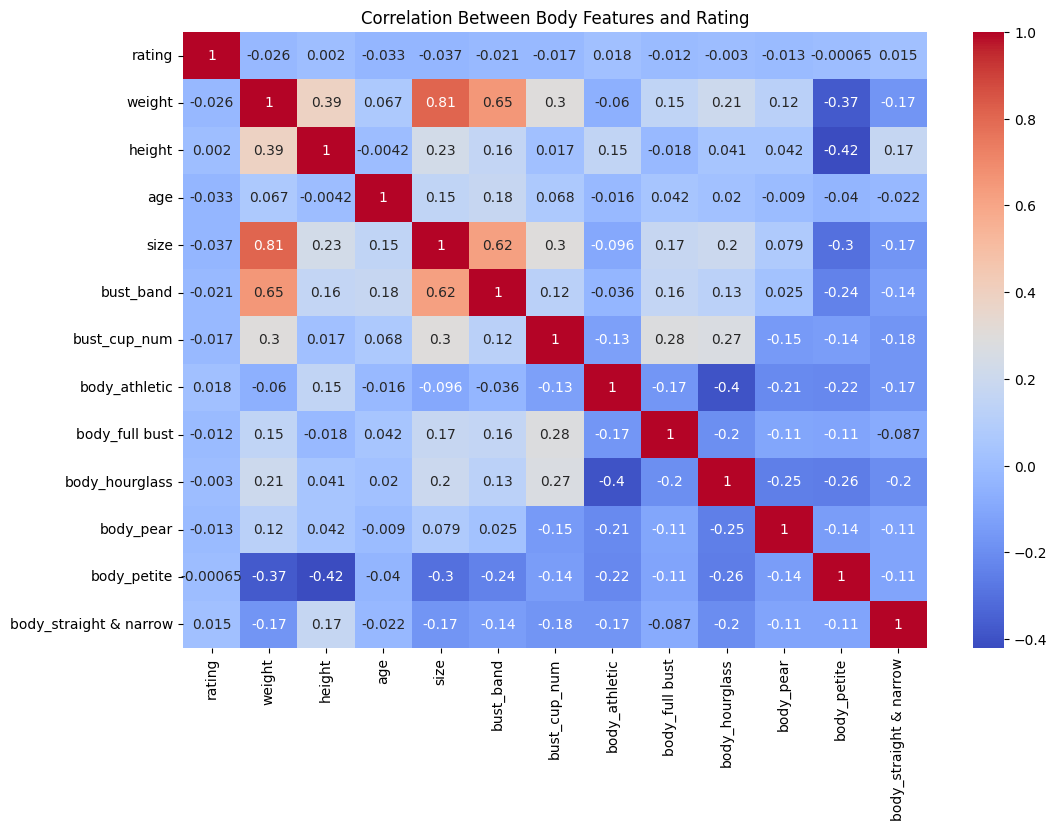

In [53]:
# Convert cup size to a numeric encoding
cup_map = {
    'aa': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'dd': 6,
    'ddd': 7, 'e': 8, 'f': 9, 'g': 10
}

df['bust_cup_num'] = df['bust_cup'].map(cup_map)

# One-hot encode body type
bodytype_dummies = pd.get_dummies(df['body type'], prefix='body', drop_first=True)

# Build correlation dataframe
corr_df = pd.concat([
    df[['rating', 'weight', 'height', 'age', 'size', 'bust_band', 'bust_cup_num']],
    bodytype_dummies
], axis=1)

# Compute correlation + heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Body Features and Rating")
plt.show()

In [54]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 171769 entries, 0 to 192543
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             171769 non-null  object        
 1   user_id         171769 non-null  object        
 2   item_id         171769 non-null  object        
 3   weight          171769 non-null  float64       
 4   rating          171769 non-null  float64       
 5   rented for      171769 non-null  object        
 6   review_text     171769 non-null  object        
 7   body type       171769 non-null  object        
 8   review_summary  171769 non-null  object        
 9   category        171769 non-null  object        
 10  height          171769 non-null  float64       
 11  age             171769 non-null  float64       
 12  review_date     171769 non-null  datetime64[ns]
 13  size            171769 non-null  int64         
 14  bust_band       171769 non-null  float64 

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,age,review_date,size,bust_band,bust_cup,bust_cup_num
count,171769,171769,171769,171769.000000,171769.000000,171769,171769,171769,171769,171769,171769.000000,171769.00000,171769,171769.000000,171769.000000,171769,165301.000000
unique,3,92674,5797,NaN,NaN,9,170554,7,138820,59,NaN,NaN,NaN,NaN,NaN,10,NaN
top,fit,691468,126335,NaN,NaN,wedding,.,hourglass,Stylist Review,dress,NaN,NaN,NaN,NaN,NaN,c,NaN
freq,126599,436,1979,NaN,NaN,51221,59,54534,870,83000,NaN,NaN,NaN,NaN,NaN,49094,NaN
mean,NaN,NaN,NaN,138.509933,4.543754,NaN,NaN,NaN,NaN,NaN,65.300310,33.87220,2016-03-14 16:20:37.047429632,11.757558,34.205625,NaN,3.888500
min,NaN,NaN,NaN,50.000000,1.000000,NaN,NaN,NaN,NaN,NaN,54.000000,14.00000,2010-11-03 00:00:00,0.000000,30.000000,NaN,1.000000
25%,NaN,NaN,NaN,125.000000,4.000000,NaN,NaN,NaN,NaN,NaN,63.000000,29.00000,2015-03-26 00:00:00,5.000000,34.000000,NaN,3.000000
50%,NaN,NaN,NaN,135.000000,5.000000,NaN,NaN,NaN,NaN,NaN,65.000000,32.00000,2016-06-15 00:00:00,12.000000,34.000000,NaN,4.000000
75%,NaN,NaN,NaN,150.000000,5.000000,NaN,NaN,NaN,NaN,NaN,67.000000,37.00000,2017-05-17 00:00:00,16.000000,36.000000,NaN,5.000000
max,NaN,NaN,NaN,300.000000,5.000000,NaN,NaN,NaN,NaN,NaN,78.000000,77.00000,2018-01-08 00:00:00,58.000000,42.000000,NaN,10.000000


In [55]:
df[["age", "size", "height", "weight", "rating"]].describe().round(2)[1:]

,age,size,height,weight,rating
mean,33.87,11.76,65.30,138.51,4.54
std,7.86,7.92,2.66,21.93,0.72
min,14.00,0.00,54.00,50.00,1.00
25%,29.00,5.00,63.00,125.00,4.00
50%,32.00,12.00,65.00,135.00,5.00
75%,37.00,16.00,67.00,150.00,5.00
max,77.00,58.00,78.00,300.00,5.00


After some cleaning and nomalizing we see the average customer is:

* About 34 years old
* Wears size 12
* Approximately 65 inches tall
* About 139 pounds
* Average item rating is 4.55 out of 5

*NOTE: Size will vary based on garment.*



## Evaluation Metrics:
- MSE
- RMSE
- MAE
- Precision at K
- Recall at K
- NDCG@K
- MAP@K

In [56]:
# =========================================================
# Evaluation Helpers (on val_df for MSE/RMSE/MAE + P@K/R@K)
# =========================================================

def get_recommendations(pred_df, k=10, top_pct=0.2):
    """
    pred_df: DataFrame with columns [user_id, item_id, actual_rating, predicted_rating]
    Returns only Top-K rows per user.
    """
    df_local = pred_df.copy()
    thresholds = df_local.groupby('user_id')['actual_rating'].quantile(1 - top_pct)
    df_local = df_local.join(thresholds.rename('threshold'), on='user_id')
    df_local['relevant'] = (df_local['actual_rating'] >= df_local['threshold']).astype(int)
    df_local['rank'] = df_local.groupby('user_id')['predicted_rating'] \
                               .rank(method='first', ascending=False)
    return df_local[df_local['rank'] <= k]

def precision_at_k(pred_df, k=40, top_pct=0.2):
    top_k = get_recommendations(pred_df, k, top_pct)
    return top_k.groupby('user_id')['relevant'].mean().mean()

def recall_at_k(pred_df, k=40, top_pct=0.2):
    df_local = pred_df.copy()
    thresholds = df_local.groupby('user_id')['actual_rating'].quantile(1 - top_pct)
    df_local = df_local.join(thresholds.rename('threshold'), on='user_id')
    df_local['relevant'] = (df_local['actual_rating'] >= df_local['threshold']).astype(int)
    total_rel = df_local.groupby('user_id')['relevant'].sum()

    top_k = get_recommendations(pred_df, k, top_pct)
    hits = top_k.groupby('user_id')['relevant'].sum()

    recall_user = (hits / total_rel).fillna(0)
    return recall_user.mean()

In [57]:
def recommender_eval_gather(recommender, method_name, k=20):

    user_ids = val_df['user_id'].unique()
    recalls=[]
    precisions=[]

    for user in user_ids:
        user_val = val_df[val_df['user_id'] == user][['item_id','rating']].to_numpy()

        positives = set(user_val[user_val[:,1] >= 4][:,0])
        if not positives:
            continue

        recs = set(recommender(user)[:k])
        hits = positives.intersection(recs)

        recall = len(hits)/len(positives)
        precision = len(hits)/k

        recalls.append(recall)
        precisions.append(precision)

    return np.mean(recalls), np.mean(precisions)

In [58]:
# =========================================================
# FIXED NDCG AND MAP FUNCTIONS
# =========================================================

import numpy as np

def dcg(rel):
    """Discounted cumulative gain for binary relevance array"""
    rel = np.asarray(rel, dtype=float)
    return np.sum((2**rel - 1) / np.log2(np.arange(2, len(rel) + 2)))


def ndcg_at_k(pred_df, k=20):
    ndcgs = []
    grouped = pred_df.groupby('user_id')

    for user, group in grouped:
        # Sort predictions by score
        group = group.sort_values('predicted_rating', ascending=False).head(k)

        # Binary relevance vector
        rel = (group['actual_rating'] >= 4).astype(int).values

        if rel.sum() == 0:
            continue  # no relevant items for this user → skip

        dcg_val = dcg(rel)
        ideal_rel = sorted(rel, reverse=True)
        idcg_val = dcg(ideal_rel)

        ndcgs.append(dcg_val / idcg_val)

    return np.mean(ndcgs) if ndcgs else 0.0


def average_precision(rel):
    rel = np.asarray(rel)
    precisions = [rel[:i+1].mean() for i in range(len(rel)) if rel[i] == 1]
    return np.mean(precisions) if precisions else 0.0


def map_at_k(pred_df, k=20):
    maps = []
    grouped = pred_df.groupby('user_id')

    for user, group in grouped:
        group = group.sort_values('predicted_rating', ascending=False).head(k)
        rel = (group['actual_rating'] >= 4).astype(int).values
        maps.append(average_precision(rel))

    return np.mean(maps) if maps else 0.0

# Models

The objective of this project was to explore different approaches for recommending clothing items within the Rent-the-Runway platform and to understand how various sources of information could influence recommendation quality. To do this, we investigated models that leveraged user ratings, item popularity, textual garment descriptions, learned latent factors, and physical body measurements. Each model represented a step toward incorporating a richer view of what influences clothing choice, beginning with behavior-driven signals and gradually expanding to include garment semantics and user-specific fit characteristics. This progression allowed us to examine how different types of data—historical interactions, language-based item semantics, and anthropometric features—contribute to the recommendation process and how they shape the model’s ability to identify suitable garments for individual users.


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import coo_matrix

In [60]:
# =========================================================
# Train / Validation / Test Split + Correct Index Mapping
# =========================================================

from sklearn.model_selection import train_test_split

# 1) Split first — no indexing before this
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=7)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=7)
# train 60% | val 20% | test 20%

print("Train size:", len(train_df))
print("Val size:  ", len(val_df))
print("Test size: ", len(test_df))

# 2) Create user/item indices **based only on TRAINING data**
train_df['user_idx'] = train_df['user_id'].astype('category').cat.codes
train_df['item_idx'] = train_df['item_id'].astype('category').cat.codes

# Save category mappings
user_categories = train_df['user_id'].astype('category').cat.categories
item_categories = train_df['item_id'].astype('category').cat.categories

# 3) Apply consistent mapping to VAL and TEST
val_df['user_idx'] = val_df['user_id'].apply(lambda u: user_categories.get_loc(u) if u in user_categories else -1)
val_df['item_idx'] = val_df['item_id'].apply(lambda i: item_categories.get_loc(i) if i in item_categories else -1)

test_df['user_idx'] = test_df['user_id'].apply(lambda u: user_categories.get_loc(u) if u in user_categories else -1)
test_df['item_idx'] = test_df['item_id'].apply(lambda i: item_categories.get_loc(i) if i in item_categories else -1)

# 4) Remove users/items not seen in training (SVD cannot predict them)
val_df = val_df[(val_df['user_idx'] != -1) & (val_df['item_idx'] != -1)]
test_df = test_df[(test_df['user_idx'] != -1) & (test_df['item_idx'] != -1)]

# 5) Final counts
num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

print("Users in TRAIN:", num_users)
print("Items in TRAIN:", num_items)
print("Users in VAL:  ", val_df['user_idx'].nunique())
print("Items in VAL:  ", val_df['item_idx'].nunique())


Train size: 103061
Val size:   34354
Test size:  34354
Users in TRAIN: 64591
Items in TRAIN: 5569
Users in VAL:   12195
Items in VAL:   4194


## Baseline Models

The project begins with simple baseline recommenders such as global popularity, user-mean, and item-mean models. These approaches do not attempt to understand garment characteristics or user preferences. Instead, they rely on aggregate statistics: the global model recommends the most rented garments overall, while the user-mean and item-mean models make predictions based on users’ past averages or item-specific averages. Surprisingly, these baselines perform reasonably well in this dataset, primarily because most users interact with only a few items. This means popularity alone explains a large fraction of rental behavior. These results reveal an important property of the dataset: user histories are extremely sparse, making it difficult for more advanced models to outperform simple heuristics. The baselines therefore highlight the fundamental challenge of apparel recommendation—there simply isn’t enough user interaction data for traditional personalization to take hold.

### Ratings-based

In [61]:
# Set top percentage for relevance (e.g., top 20% of each user's ratings)
top_pct = 0.1

In [62]:
# 1. Global Mean
global_mean = train_df['rating'].mean()
val_preds = np.full(len(val_df), global_mean)

pred_global = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("\nGLOBAL MEAN BASELINE")
mse = mean_squared_error(pred_global['actual_rating'], pred_global['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_global['actual_rating'], pred_global['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)


GLOBAL MEAN BASELINE
MSE: 0.5522453849584318 RMSE: 0.7431321450175815 MAE: 0.6066198709714945


In [63]:
# 2. User Mean
user_mean = train_df.groupby('user_id')['rating'].mean()
val_preds = val_df['user_id'].map(user_mean).fillna(global_mean)

pred_user = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("USER MEAN BASELINE")
mse = mean_squared_error(pred_user['actual_rating'], pred_user['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_user['actual_rating'], pred_user['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

USER MEAN BASELINE
MSE: 0.760494008478206 RMSE: 0.872063075974557 MAE: 0.5839802756405368


In [64]:
# 3. Weighted Popularity
item_counts = train_df.groupby('item_id').size()
item_avg = train_df.groupby('item_id')['rating'].mean()
k_wp = 5

def weighted_popularity(iid):
    count = item_counts.get(iid, 0)
    rating = item_avg.get(iid, global_mean)
    return (count * rating + k_wp * global_mean) / (count + k_wp)

val_preds = val_df['item_id'].map(weighted_popularity)

pred_pop = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("WEIGHTED POPULARITY BASELINE")
mse = mean_squared_error(pred_pop['actual_rating'], pred_pop['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_pop['actual_rating'], pred_pop['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

WEIGHTED POPULARITY BASELINE
MSE: 0.5322239729689052 RMSE: 0.7295368208451889 MAE: 0.5760011423113415


In [65]:
# 4. Combined User–Item Mean
item_mean = train_df.groupby('item_id')['rating'].mean()

val_preds = (
    0.5 * val_df['user_id'].map(user_mean) +
    0.5 * val_df['item_id'].map(item_mean)
).fillna(global_mean)

pred_comb = pd.DataFrame({
    'user_id': val_df['user_id'],
    'item_id': val_df['item_id'],
    'actual_rating': val_df['rating'],
    'predicted_rating': val_preds
})

print("COMBINED USER–ITEM MEAN")
mse = mean_squared_error(pred_comb['actual_rating'], pred_comb['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_comb['actual_rating'], pred_comb['predicted_rating'])
print("MSE:", mse, "RMSE:", rmse, "MAE:", mae)

COMBINED USER–ITEM MEAN
MSE: 0.5596730280485868 RMSE: 0.7481129781313693 MAE: 0.5665164897690287


### Rankings Based

In [66]:
# ====================================================================
# BASELINE 1 — GLOBAL POPULARITY RECOMMENDER
# ====================================================================

# Compute popularity ranking once
item_popularity = train_df.groupby('item_id').size().sort_values(ascending=False)
global_pop_list = list(item_popularity.index)

def baseline_global_pop(user_id, k=20):
    """Return top-K most popular items globally."""
    return global_pop_list[:k]

In [67]:
# ====================================================================
# BASELINE 2 — USER MEAN RECOMMENDER
# ====================================================================

user_mean = train_df.groupby('user_id')['rating'].mean()
item_mean = train_df.groupby('item_id')['rating'].mean().fillna(user_mean.mean())

def baseline_user_mean(user_id, k=20):
    """Recommend items closest to this user's mean taste."""
    if user_id not in user_mean:
        return baseline_global_pop(user_id, k)  # cold start

    u_mean = user_mean[user_id]

    # score = -(abs(item_avg - user_mean)) so closer mean = higher score
    scores = (item_mean - u_mean).abs()
    ranked = scores.sort_values().index.tolist()  # lowest diff first
    return ranked[:k]

In [68]:
# ====================================================================
# BASELINE 3 — WEIGHTED POPULARITY RECOMMENDER
# ====================================================================

item_counts = train_df.groupby('item_id').size()
item_avg = train_df.groupby('item_id')['rating'].mean()
k_smooth = 5  # smoothing for low-frequency items

weighted_score = ((item_counts * item_avg) + (k_smooth * global_mean)) / (item_counts + k_smooth)
weighted_ranked_list = weighted_score.sort_values(ascending=False).index.tolist()

def baseline_weighted_pop(user_id, k=20):
    return weighted_ranked_list[:k]

In [69]:
# ====================================================================
# BASELINE 4 — USER–ITEM MEAN HYBRID
# ====================================================================

item_mean = train_df.groupby('item_id')['rating'].mean()
user_mean = train_df.groupby('user_id')['rating'].mean()

def baseline_user_item_mean(user_id, k=20):
    if user_id not in user_mean:
        return baseline_global_pop(user_id, k)  # cold start

    scores = 0.5 * user_mean[user_id] + 0.5 * item_mean
    ranked = scores.sort_values(ascending=False).index.tolist()
    return ranked[:k]

In [70]:
for name, model in [
    ("GLOBAL POP", baseline_global_pop),
    ("USER MEAN", baseline_user_mean),
    ("WEIGHTED POP", baseline_weighted_pop),
    ("USER+ITEM MEAN", baseline_user_item_mean)
]:
    recall, precision = recommender_eval_gather(model, name, k=20)
    print(f"{name}: P@20={precision:.4f}, R@20={recall:.4f}")

GLOBAL POP: P@20=0.0048, R@20=0.0810
USER MEAN: P@20=0.0001, R@20=0.0008
WEIGHTED POP: P@20=0.0006, R@20=0.0098
USER+ITEM MEAN: P@20=0.0001, R@20=0.0007


Global Popularity is a good predictor

## TFIDF + SVD

The hybrid model combines the semantic strengths of TF-IDF with the personalization abilities of SVD. It first uses TF-IDF to narrow down a set of candidate garments that are textually similar to items a user previously rented, and then attempts to personalize ranking within this reduced list using SVD. Conceptually, this is designed to be a best-of-both-worlds approach. However, the evaluation tells a different story. The hybrid system produces higher coverage and explores more of the garment catalog than baselines, but it still struggles with precision and recall. The personalized reranking step does not add much value because collaborative filtering cannot form stable user representations when each user rents so few items. The model effectively discovers relevant garments, but it does not reliably identify the best ones for each user. This reinforces a key conclusion: personalization based on co-interaction patterns does not work well when users have almost no overlap in their rental histories.

In [78]:
# ==========================================
# SAMPLE DATA FOR FAST EXPERIMENTATION
# ==========================================

SAMPLE_USERS = 10000
SAMPLE_ITEMS = 2000

print("Original rows:", len(df))

user_sample = df['user_id'].drop_duplicates().sample(SAMPLE_USERS, random_state=42)
df_small = df[df['user_id'].isin(user_sample)]

item_sample = df_small['item_id'].drop_duplicates().sample(SAMPLE_ITEMS, random_state=42)
df_small = df_small[df_small['item_id'].isin(item_sample)]

print("Sampled rows:", len(df_small))
print("Unique users:", df_small['user_id'].nunique())
print("Unique items:", df_small['item_id'].nunique())


Original rows: 171769
Sampled rows: 8909
Unique users: 5861
Unique items: 2000


In [79]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_small, test_size=0.2, random_state=7)

train_df['user_idx'] = train_df['user_id'].astype('category').cat.codes
train_df['item_idx'] = train_df['item_id'].astype('category').cat.codes

user_cats = train_df['user_id'].astype('category').cat.categories
item_cats = train_df['item_id'].astype('category').cat.categories

val_df['user_idx'] = val_df['user_id'].apply(lambda u: user_cats.get_loc(u) if u in user_cats else -1)
val_df['item_idx'] = val_df['item_id'].apply(lambda i: item_cats.get_loc(i) if i in item_cats else -1)

val_df = val_df[(val_df['user_idx'] != -1) & (val_df['item_idx'] != -1)]

num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

print(num_users, num_items)

4929 1875


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print("\n=== BUILDING TF-IDF ITEM INDEX ===")

train_df['tfidf_text'] = (
    train_df['category'].fillna('') + ' ' +
    train_df['review_summary'].fillna('') + ' ' +
    train_df['review_text'].fillna('')
).str.lower()

item_text = train_df.groupby('item_id')['tfidf_text'].apply(' '.join)
item_ids = item_text.index.tolist()

tfidf = TfidfVectorizer(max_features=4000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(item_text)
similarity = cosine_similarity(tfidf_matrix)

print("TF-IDF ready:", tfidf_matrix.shape)


=== BUILDING TF-IDF ITEM INDEX ===
TF-IDF ready: (1875, 4000)


In [81]:
def tfidf_candidates(user_id, k=300):
    user_rows = train_df[train_df['user_id'] == user_id]
    if user_rows.empty:
        return []

    top_item = user_rows.sort_values('rating', ascending=False).iloc[0]['item_id']
    if top_item not in item_ids:
        return []

    idx = item_ids.index(top_item)
    sims = similarity[idx]
    cand_idx = sims.argsort()[::-1][1:k+1]
    return [item_ids[i] for i in cand_idx]


In [82]:
from surprise import Dataset, Reader, SVD

print("\n=== TRAINING SVD ===")

reader = Reader(rating_scale=(1,5))
svd_data = Dataset.load_from_df(train_df[['user_id','item_id','rating']], reader)
svd_trainset = svd_data.build_full_trainset()

svd = SVD(
    n_factors=80,
    lr_all=0.006,
    reg_all=0.03,
    biased=True,
    random_state=42
)
svd.fit(svd_trainset)

print("SVD done.")



=== TRAINING SVD ===
SVD done.


In [83]:
def svd_rerank(user_id, candidates, top_k=20):
    scored = [(item, svd.predict(user_id, item).est) for item in candidates]
    ranked = sorted(scored, key=lambda x: x[1], reverse=True)
    return [item for item, _ in ranked[:top_k]]

def hybrid_recommender(user_id, k_candidates=300, k_final=20):
    cands = tfidf_candidates(user_id, k_candidates)
    if not cands: return []
    return svd_rerank(user_id, cands, k_final)


In [84]:
# ============================================================
# HYBRID (TF-IDF + SVD) FULL EVALUATION BLOCK
# ============================================================

print("\n=== HYBRID MODEL EVALUATION (TF-IDF + SVD) ===")

K_FINAL = 20  # final number of recommendations

# 1) Standard ranking metrics
recall, precision = recommender_eval_gather(
    recommender=hybrid_recommender,
    method_name="Hybrid TFIDF+SVD",
    k=K_FINAL
)

# Build pred_df for NDCG / MAP
rows = []
val_groups = val_df.groupby('user_id')
for user in val_groups.groups:
    recs = hybrid_recommender(user, k_candidates=300, k_final=K_FINAL)
    if not recs:
        continue
    actual = val_groups.get_group(user).set_index('item_id')['rating']
    for iid in recs:
        rows.append([user, iid, actual.get(iid, np.nan), 1.0])

pred_hybrid = pd.DataFrame(rows, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating'])

ndcg = ndcg_at_k(pred_hybrid, K_FINAL)
mapk = map_at_k(pred_hybrid, K_FINAL)


# 2) Coverage — how many unique items are ever recommended
all_recs = []
for user in val_df['user_id'].unique():
    all_recs.extend(hybrid_recommender(user, k_final=K_FINAL))

coverage = len(set(all_recs)) / train_df['item_id'].nunique()


# 3) Candidate Reduction — efficiency vs. pure SVD
full_catalog = train_df['item_id'].nunique()
reduced_catalog = 300  # TF-IDF candidate pool
reduction = 1 - reduced_catalog / full_catalog


# 4) Cold-start user performance (users with ≤ 3 interactions)
user_inter_count = train_df.groupby('user_id').size()
cold_users = user_inter_count[user_inter_count <= 3].index

cold_recalls = []
for cu in cold_users:
    val_items = set(val_df[val_df.user_id == cu][val_df.rating >= 4]['item_id'])
    if not val_items:
        continue
    recs = set(hybrid_recommender(cu, k_final=K_FINAL))
    cold_recalls.append(len(val_items.intersection(recs)) / len(val_items))

cold_recall = np.mean(cold_recalls) if cold_recalls else 0.0


# ============================================================
# DISPLAY RESULTS
# ============================================================
print("\nHYBRID MODEL RESULTS (TF-IDF + SVD)")
print("---------------------------------------------")
print(f"Precision@{K_FINAL}:  {precision:.4f}")
print(f"Recall@{K_FINAL}:     {recall:.4f}")
print(f"NDCG@{K_FINAL}:       {ndcg:.4f}")
print(f"MAP@{K_FINAL}:        {mapk:.4f}")
print("---------------------------------------------")
print(f"Item Coverage:        {coverage:.4f}")
print(f"Catalog Reduction:    {reduction*100:.2f}% fewer items scored")
print(f"Cold-Start Recall:    {cold_recall:.4f}")
print("---------------------------------------------\n")


=== HYBRID MODEL EVALUATION (TF-IDF + SVD) ===

HYBRID MODEL RESULTS (TF-IDF + SVD)
---------------------------------------------
Precision@20:  0.0015
Recall@20:     0.0255
NDCG@20:       0.3038
MAP@20:        0.0032
---------------------------------------------
Item Coverage:        0.3221
Catalog Reduction:    84.00% fewer items scored
Cold-Start Recall:    0.0275
---------------------------------------------



TF-IDF overcomes SVD’s sparsity limitations by generating semantically meaningful item neighborhoods independent of user interactions, allowing SVD to personalize only within a relevant set of candidates rather than the full, sparse item space.

## SVD (Collaborative Filtering)

The first sophisticated model explored is Surprise SVD, a collaborative filtering technique based on matrix factorization. Collaborative filtering assumes that people who behaved similarly in the past will continue to behave similarly, and SVD tries to learn this structure by compressing users and items into hidden representations called latent factors. A “latent factor” is simply a mathematical feature the model learns automatically, not something explicitly provided in the data; for example, it might discover that certain users implicitly prefer formal dresses or that some garments appeal to tall customers, even if those attributes were never specified. Although SVD produces low error when reconstructing ratings—suggesting it understands the numeric patterns—it performs poorly when actually ranking items for recommendation. This failure occurs because most ratings are uniformly positive and each user has rented very few garments, so the model cannot infer meaningful latent preferences. The evaluation shows that accurate rating prediction does not translate into high-quality recommendations when the underlying data lacks contrast and density.

In [87]:
# ============================================================
# PURE SVD COLLABORATIVE FILTERING (CORRECT TOP-K RECOMMENDER)
# ============================================================

print("\n=== SVD COLLABORATIVE FILTERING (TOP-K LATENT RECS) ===")

from surprise import Dataset, Reader, SVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# OPTIONAL: subsample for speed (remove for full training)
# train_small = train_df.sample(100000, random_state=42)
train_small = train_df.copy()
print("Training on subset:", len(train_small))

# 1) Train SVD
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train_small[['user_id', 'item_id', 'rating']], reader)
trainset = train_data.build_full_trainset()

algo = SVD(
    n_factors=60,
    lr_all=0.006,
    reg_all=0.02,
    biased=True,
    random_state=42
)
algo.fit(trainset)

# 2) Extract latent factors and biases
U = algo.pu           # user latent vectors
V = algo.qi           # item latent vectors
bu = algo.bu          # user biases
bi = algo.bi          # item biases
global_bias = algo.trainset.global_mean

# helper maps raw IDs <-> internal indices
sur_uid = {trainset.to_raw_uid(i): i for i in range(trainset.n_users)}
sur_iid = {trainset.to_raw_iid(i): i for i in range(trainset.n_items)}

# user → items seen in training
train_items_by_user = train_small.groupby('user_id')['item_id'].apply(set)


# ============================================================
# 3) CORRECT SVD TOP-K RECOMMENDER
# ============================================================
def svd_recommend(user_id, k=20):
    """
    Return top-k unseen items using learned latent factors.
    Returns (item_id, score) pairs.
    """

    if user_id not in sur_uid:
        return []

    uid = sur_uid[user_id]
    seen = train_items_by_user.get(user_id, set())

    all_items = np.arange(len(V))
    unseen = np.array([i for i in all_items if trainset.to_raw_iid(i) not in seen])

    if unseen.size == 0:
        return []

    # latent prediction scores: μ + b_u + b_i + p_u · q_i
    scores = (
        global_bias +
        bu[uid] +
        bi[unseen] +
        np.dot(V[unseen], U[uid])
    )

    k_eff = min(k, len(scores))
    top_idx = np.argpartition(scores, -k_eff)[-k_eff:]
    top_idx = top_idx[np.argsort(scores[top_idx])[::-1]]

    # return (item_id, score)
    return [(trainset.to_raw_iid(int(unseen[i])), float(scores[i])) for i in top_idx]


# ============================================================
# 4) EVALUATE ON VALIDATION SET — NO LEAKAGE
# ============================================================
rows = []
val_groups = val_df.groupby('user_id')

for user in val_groups.groups:
    recs = svd_recommend(user, k=20)
    if not recs:
        continue

    actual = val_groups.get_group(user).set_index('item_id')['rating']

    for iid, score in recs:
        rows.append([user, iid, actual.get(iid, np.nan), score])

pred_svd = pd.DataFrame(rows, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating'])

# rating error metrics on overlap only
overlap = pred_svd.dropna(subset=['actual_rating'])
mse = mean_squared_error(overlap['actual_rating'], overlap['predicted_rating'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(overlap['actual_rating'], overlap['predicted_rating'])

# top-k classification metrics
pred_svd['relevant'] = pred_svd['actual_rating'].ge(4).fillna(False).astype(int)
precision = pred_svd.groupby('user_id')['relevant'].mean().mean()

pos = val_df[val_df['rating'] >= 4].groupby('user_id').size()
hits = pred_svd[pred_svd['relevant'] == 1].groupby('user_id').size()
recall = (hits / pos).fillna(0).mean()

# ============================================================
# 5) RESULTS
# ============================================================
print("\nSVD RESULTS (TOP-K LATENT RECOMMENDER)")
print("---------------------------------------")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision@20: {precision:.4f}")
print(f"Recall@20:    {recall:.4f}")
print(f"NDCG@20:      {ndcg_at_k(pred_svd, 20):.4f}")
print(f"MAP@20:       {map_at_k(pred_svd, 20):.4f}")
print("---------------------------------------")


=== SVD COLLABORATIVE FILTERING (TOP-K LATENT RECS) ===
Training on subset: 7127

SVD RESULTS (TOP-K LATENT RECOMMENDER)
---------------------------------------
MSE: 0.3262
RMSE: 0.5711
MAE: 0.4203
Precision@20: 0.0010
Recall@20:    0.0188
NDCG@20:      0.3491
MAP@20:       0.0034
---------------------------------------


## TFIDF + KNN

The next model shifts focus from user interactions to garment semantics by analyzing textual reviews using TF-IDF (Term Frequency–Inverse Document Frequency), a technique that measures how important words are in describing items. TF-IDF creates a numerical representation of each garment based on the language users employ to describe it—words like “stretchy,” “floor-length,” “summer wedding,” or “runs small” become clues about the garment’s attributes. This model uses these textual embeddings to compute item similarity. Its evaluation demonstrates that garments naturally cluster into meaningful groups using text alone, even without user history. The strong recall results of this approach suggest that customers repeatedly rent items that are semantically similar, revealing that text captures a significant portion of rental decision logic. In other words, the language users use to describe clothing provides a surprisingly reliable blueprint for recommendation behavior.

In [93]:
# ===========================================
# ITEM-BASED TF-IDF + KNOWN NEIGHBORS
# ===========================================

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

print("\n=== FAST ITEM TF-IDF MODEL ===")

# ===========================================
# 0) SAMPLE ITEMS to reduce runtime
# ===========================================
item_sample_frac = 0.50  # keep 10% of items
unique_items_before = train_df['item_id'].nunique()

sampled_items = train_df['item_id'].drop_duplicates().sample(
    frac=item_sample_frac,
    random_state=42
)
train_df = train_df[train_df['item_id'].isin(sampled_items)]

unique_items_after = train_df['item_id'].nunique()

print(f"Items before sampling: {unique_items_before}")
print(f"Items after sampling:  {unique_items_after}")
print(f"Training rows after sampling: {len(train_df)}")


# ===========================================
# 1) Build item-level text
# ===========================================
train_df['tfidf_text'] = (
    train_df['category'].fillna('') + ' ' +
    train_df['review_summary'].fillna('') + ' ' +
    train_df['review_text'].fillna('')
).str.lower()

item_text = train_df.groupby('item_id')['tfidf_text'].agg(' '.join)
item_ids = item_text.index.tolist()

print("Final item count:", len(item_ids))


# ===========================================
# 2) TF-IDF Vectorization
# ===========================================
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=3000,
    min_df=5
)

tfidf_matrix = tfidf.fit_transform(item_text.values)
print("TF-IDF matrix shape:", tfidf_matrix.shape)


# ===========================================
# 3) Precompute Neighbors ONCE
# ===========================================
K = min(101, len(item_ids))  # includes self

knn = NearestNeighbors(
    n_neighbors=K,
    metric='cosine',
    algorithm='brute'
).fit(tfidf_matrix)

item_neighbors = knn.kneighbors(tfidf_matrix, return_distance=False)

item_to_idx = {iid: idx for idx, iid in enumerate(item_ids)}
idx_to_item = np.array(item_ids)

print("Neighbor index table ready ✓", item_neighbors.shape)
print(f"Using K={K} neighbors per item")


# ===========================================
# 4) Recommender
# ===========================================
def recommend_items_for_user_fast(user_id, k=60):
    """Return top-k TF-IDF similar items in O(1) time."""
    k = min(k, K - 1)  # avoid overflow for small item sets

    user_hist = train_df[train_df.user_id == user_id]
    if user_hist.empty:
        return []

    # pick user's highest-rated item
    top_item = user_hist.sort_values('rating', ascending=False).item_id.iloc[0]

    if top_item not in item_to_idx:
        return []

    idx = item_to_idx[top_item]
    rec_idx = item_neighbors[idx][1:k+1]  # skip itself
    return idx_to_item[rec_idx].tolist()


# ===========================================
# 5) Recall@K Evaluation
# ===========================================
def recommender_eval_gather_fast(recommender, method_name, k=60):
    recalls = []

    for user in val_df['user_id'].unique():
        val_user = val_df[val_df.user_id == user]
        positives = set(val_user[val_user.rating >= 4].item_id)

        if not positives:
            continue

        recs = recommender(user, k=k)
        hits = len(positives.intersection(recs))
        recalls.append(hits / len(positives))

    mean_recall = np.mean(recalls) if recalls else 0.0
    print(f"{method_name} Recall@{k}: {mean_recall:.4f}")
    return mean_recall


# ===========================================
# 6) RUN EVAL
# ===========================================
recall = recommender_eval_gather_fast(
    recommend_items_for_user_fast,
    "TFIDF_FAST_OPT",
    k=min(60, K - 1)
)


=== FAST ITEM TF-IDF MODEL ===
Items before sampling: 1875
Items after sampling:  938
Training rows after sampling: 3263
Final item count: 938
TF-IDF matrix shape: (938, 1648)
Neighbor index table ready ✓ (938, 101)
Using K=101 neighbors per item
TFIDF_FAST_OPT Recall@60: 0.0808


## Fit-Based Predictors

### K-LF-ML Fit Model (Latent Factors + Metric Learning)

In [90]:
# =========================================================
# K-LF-ML STYLE MODEL (Latent Fit Semantics + LMNN + k-NN)
# Inspired by: "Decomposing Fit Semantics for Product Size
# Recommendation in Metric Spaces" (RecSys’18)
# =========================================================

print("\n=== K-LF-ML STYLE FIT MODEL (LATENT + LMNN) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
# We only keep rows that have fit labels in the 3 main classes
valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

# Map fit string → ordinal class: Small=0, Fit=1, Large=2
fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) LATENT FACTOR FIT SEMANTICS (K-LF)
# ---------------------------------------------------------
# We learn K-dimensional user/item latent factors and a small
# softmax classifier on top. This is the "fit semantics"
# stage that feeds into the metric learning stage.

K = 20                  # latent dimension (increased from 10)
lr = 0.05               # learning rate for latent + softmax
epochs = 5              # number of passes over the data
batch_size = 2048       # mini-batch size

num_users = train_df['user_idx'].nunique()
num_items = train_df['item_idx'].nunique()

rng = np.random.default_rng(42)

# User and item latent factors
U_latent = rng.normal(0.0, 0.1, size=(num_users, K))
V_latent = rng.normal(0.0, 0.1, size=(num_items, K))

# Softmax classifier parameters: 3 classes x K dims
W_clf = rng.normal(0.0, 0.1, size=(3, K))
b_clf = np.zeros(3, dtype=float)

# For faster access, keep arrays of indices/labels
u_idx_train = train_fit_df['user_idx'].values
i_idx_train = train_fit_df['item_idx'].values
y_train_cls = train_fit_df['y'].values

n_train_fit = len(train_fit_df)

print("\n[Stage 1] Training latent fit semantics (K-LF)...")
for epoch in range(epochs):
    # Shuffle indices each epoch
    perm = rng.permutation(n_train_fit)

    total_loss = 0.0
    num_batches = 0

    for start in range(0, n_train_fit, batch_size):
        end = min(start + batch_size, n_train_fit)
        batch_idx = perm[start:end]

        u_b = u_idx_train[batch_idx]
        i_b = i_idx_train[batch_idx]
        y_b = y_train_cls[batch_idx]   # (B,)

        # 1) Build latent feature for each transaction
        #    x_t = U[user] ⊙ V[item]  (elementwise product)
        x_b = U_latent[u_b] * V_latent[i_b]  # (B, K)

        # 2) Softmax logits and probabilities
        logits = x_b @ W_clf.T + b_clf      # (B, 3)
        logits -= logits.max(axis=1, keepdims=True)  # stability
        exp_logits = np.exp(logits)
        probs = exp_logits / exp_logits.sum(axis=1, keepdims=True)  # (B,3)

        # 3) Cross-entropy loss
        B = len(y_b)
        Y_onehot = np.zeros((B, 3), dtype=float)
        Y_onehot[np.arange(B), y_b] = 1.0

        eps = 1e-9
        loss = -np.sum(Y_onehot * np.log(probs + eps)) / B
        total_loss += loss
        num_batches += 1

        # 4) Backprop gradients
        # dL/dlogits = (probs - Y) / B
        grad_logits = (probs - Y_onehot) / B  # (B,3)

        # dL/dW = grad_logits^T @ x_b
        grad_W = grad_logits.T @ x_b         # (3,K)
        grad_b = grad_logits.sum(axis=0)     # (3,)

        # dL/dx = grad_logits @ W
        grad_x = grad_logits @ W_clf         # (B,K)

        # x = U[u] * V[i] => dL/dU[u] = grad_x * V[i]
        #                   dL/dV[i] = grad_x * U[u]
        grad_U = grad_x * V_latent[i_b]
        grad_V = grad_x * U_latent[u_b]

        # 5) Gradient step
        W_clf -= lr * grad_W
        b_clf -= lr * grad_b

        # Aggregate gradients on U and V because users/items can repeat
        for idx_local, u in enumerate(u_b):
            U_latent[u] -= lr * grad_U[idx_local]
        for idx_local, it in enumerate(i_b):
            V_latent[it] -= lr * grad_V[idx_local]

    avg_loss = total_loss / max(num_batches, 1)
    print(f"Epoch {epoch+1}/{epochs} - Avg loss: {avg_loss:.4f}")

print("Latent fit semantics training complete ✓")

# ---------------------------------------------------------
# 3) BUILD TRANSACTION EMBEDDINGS (X) FOR LMNN
# ---------------------------------------------------------
# For each transaction, we use x_t = U[user] ⊙ V[item]

X_train_fit = U_latent[u_idx_train] * V_latent[i_idx_train]
y_train_fit = y_train_cls

u_idx_val = val_fit_df['user_idx'].values
i_idx_val = val_fit_df['item_idx'].values
y_val_fit = val_fit_df['y'].values

X_val_fit = U_latent[u_idx_val] * V_latent[i_idx_val]

# ---------------------------------------------------------
# 4) PROTOTYPE SAMPLING TO HANDLE IMBALANCE
# ---------------------------------------------------------
# We randomly subsample up to max_per_class samples from
# each class to keep LMNN training fast and balanced.

max_per_class = 1000
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_fit[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("\n[Stage 2] Metric learning (LMNN) on prototypes...")
print("LMNN training samples:", X_train_sub.shape[0])

# ---------------------------------------------------------
# 5) LMNN METRIC LEARNING
# ---------------------------------------------------------
lmnn = LMNN(
    k=5,
    learn_rate=5e-7,
    max_iter=10,
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_fit)
X_val_lmnn   = lmnn.transform(X_val_fit)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 6) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\n[Stage 3] k-NN classification in LMNN space")
print("Validation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(y_val_fit, y_val_pred, target_names=['Small','Fit','Large']))

# ---------------------------------------------------------
# 7) MULTI-CLASS AUC (LIKE THE PAPER)
# ---------------------------------------------------------
# We compute macro-averaged AUC in a one-vs-rest fashion.
y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])  # shape (N,3)

try:
    auc_macro = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')
    print(f"Macro AUC (Val, LMNN + kNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== K-LF-ML STYLE FIT MODEL DONE ✓ ===")



=== K-LF-ML STYLE FIT MODEL (LATENT + LMNN) ===
Train fit samples: 7127
Val fit samples:   708
Fit label distribution (train):
y
0    0.136663
1    0.744212
2    0.119124
Name: proportion, dtype: float64

[Stage 1] Training latent fit semantics (K-LF)...
Epoch 1/5 - Avg loss: 1.0801
Epoch 2/5 - Avg loss: 1.0348
Epoch 3/5 - Avg loss: 0.9952
Epoch 4/5 - Avg loss: 0.9615
Epoch 5/5 - Avg loss: 0.9325
Latent fit semantics training complete ✓

[Stage 2] Metric learning (LMNN) on prototypes...
LMNN training samples: 2823
iter | objective | objective difference | active constraints | learning rate
2 13214074.58558981 -128.80068664439023 26499260 5.049999999999999e-07
3 13213944.011003109 -130.57458670064807 26499260 5.100499999999999e-07
4 13213811.633110855 -132.37789225392044 26499260 5.151504999999999e-07
5 13213677.421913734 -134.21119712106884 26499260 5.203020049999999e-07
6 13213541.346804332 -136.07510940171778 26499260 5.255050250499999e-07
7 13213403.376552455 -137.97025187686086 26

### Feature-Based Fit Metric Model (Anthropometrics + LMNN)

In [91]:
# =========================================================
# FEATURE + LMNN FIT MODEL (Anthropometrics + Garment Features)
# Metric learning over explicit fit-relevant features
# =========================================================

print("\n=== FEATURE + LMNN FIT MODEL (BODY + GARMENT FEATURES) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from metric_learn import LMNN  # !pip install metric-learn if needed

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) DEFINE EXPLICIT USER + ITEM FEATURES
# ---------------------------------------------------------
# Same features you used for LightGBM, but now as an embedding input
num_cols = ['age', 'height', 'weight', 'size', 'bust_band']
cat_cols = ['bust_cup', 'body type', 'rented for', 'category']

# Drop rows with missing features just in case
train_fit_df = train_fit_df.dropna(subset=num_cols + cat_cols)
val_fit_df   = val_fit_df.dropna(subset=num_cols + cat_cols)

X_train_raw = train_fit_df[num_cols + cat_cols]
y_train_fit = train_fit_df['y'].values

X_val_raw = val_fit_df[num_cols + cat_cols]
y_val_fit = val_fit_df['y'].values

# ---------------------------------------------------------
# 3) PREPROCESS → STANDARDIZE NUMERIC, ONE-HOT CATEGORICAL
# ---------------------------------------------------------
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_full = preprocess.fit_transform(X_train_raw)
X_val_full   = preprocess.transform(X_val_raw)

print("Feature space shape (before PCA):", X_train_full.shape)

# ---------------------------------------------------------
# 4) DIMENSIONALITY REDUCTION (PCA) BEFORE LMNN
# ---------------------------------------------------------
pca_dim = 30  # embedding dimension before metric learning
pca = PCA(n_components=pca_dim, random_state=42)

X_train_emb = pca.fit_transform(X_train_full)
X_val_emb   = pca.transform(X_val_full)

print("Embedded feature shape (after PCA):", X_train_emb.shape)

# ---------------------------------------------------------
# 5) PROTOTYPE SAMPLING TO BALANCE CLASSES FOR LMNN
# ---------------------------------------------------------
rng = np.random.default_rng(42)

max_per_class = 1000
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_emb[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("\n[Stage 1] Metric learning (LMNN) on body+garment features...")
print("LMNN training samples:", X_train_sub.shape[0])

lmnn = LMNN(
    k=5,
    learn_rate=1e-6,
    max_iter=100,
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_emb)
X_val_lmnn   = lmnn.transform(X_val_emb)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 6) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred  = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\n[Stage 2] k-NN classification in LMNN space")
print("Validation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(
    y_val_fit,
    y_val_pred,
    target_names=['Small','Fit','Large']
))

# ---------------------------------------------------------
# 7) MULTI-CLASS MACRO AUC (MAIN PAPER METRIC)
# ---------------------------------------------------------
y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])

try:
    auc_macro = roc_auc_score(
        y_val_bin,
        y_val_proba,
        average='macro',
        multi_class='ovr'
    )
    print(f"Macro AUC (Val, FEATURE + LMNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== FEATURE + LMNN FIT MODEL DONE ✓ ===")



=== FEATURE + LMNN FIT MODEL (BODY + GARMENT FEATURES) ===
Train fit samples: 7127
Val fit samples:   708
Fit label distribution (train):
y
0    0.136663
1    0.744212
2    0.119124
Name: proportion, dtype: float64
Feature space shape (before PCA): (7127, 71)
Embedded feature shape (after PCA): (7127, 30)

[Stage 1] Metric learning (LMNN) on body+garment features...
LMNN training samples: 2823
iter | objective | objective difference | active constraints | learning rate
2 127989.88546504566 -221.91486695712956 224018 1.0099999999999999e-06
3 127813.30095961291 -176.58450543275103 224534 1.0200999999999998e-06
4 127665.32375128398 -147.9772083289281 225142 1.0303009999999997e-06
5 127536.23981572971 -129.08393555427028 225728 1.0406040099999998e-06
6 127421.23181713845 -115.00799859125982 226235 1.0510100500999999e-06
7 127316.78604534324 -104.4457717952173 226784 1.061520150601e-06
8 127221.08835712475 -95.69768821848265 227277 1.07213535210701e-06
9 127132.5410226291 -88.5473344956553

### Multimodal Fit Metric Model (Body Features + Garment Semantics)

In [92]:
# =========================================================
# UPDATED FEATURE + LMNN FIT MODEL
# (BODY FEATURES + GARMENT TEXT EMBEDDINGS)
# =========================================================

print("\n=== UPDATED FEATURE + LMNN FIT MODEL (BODY + GARMENT TEXT) ===")

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

from metric_learn import LMNN  # make sure: pip install metric-learn

# ---------------------------------------------------------
# 0) BUILD ITEM-LEVEL GARMENT TEXT EMBEDDINGS
# ---------------------------------------------------------
print("\n[Step 0] Building garment text embeddings...")

item_text_df = (
    train_df[['item_id', 'category', 'review_summary', 'review_text']]
    .fillna('')
    .copy()
)

item_text_df['tfidf_text'] = (
    item_text_df['category'] + ' ' +
    item_text_df['review_summary'] + ' ' +
    item_text_df['review_text']
).str.lower()

# One document per item
item_text_grouped = item_text_df.groupby('item_id')['tfidf_text'].apply(' '.join)

tfidf_text = TfidfVectorizer(
    stop_words='english',
    max_features=2000,
    min_df=5
)
X_tfidf_items = tfidf_text.fit_transform(item_text_grouped.values)

# Compress text to low-dim embedding
text_dim = 20
svd_text = TruncatedSVD(n_components=text_dim, random_state=42)
X_item_text_emb = svd_text.fit_transform(X_tfidf_items)

text_cols = [f"text_emb_{i}" for i in range(text_dim)]
item_text_emb = pd.DataFrame(
    X_item_text_emb,
    index=item_text_grouped.index,
    columns=text_cols
)

print("Garment text embedding shape:", item_text_emb.shape)

# ---------------------------------------------------------
# 1) BUILD FIT-LABEL DATASET (Small / Fit / Large)
# ---------------------------------------------------------
print("\n[Step 1] Building fit label dataset...")

valid_fits = ['small', 'fit', 'large', 'Small', 'Fit', 'Large']

train_fit_df = train_df[train_df['fit'].isin(valid_fits)].copy()
val_fit_df   = val_df[val_df['fit'].isin(valid_fits)].copy()

fit_to_label = {
    'small': 0, 'Small': 0,
    'fit':   1, 'Fit':   1,
    'large': 2, 'Large': 2
}
train_fit_df['y'] = train_fit_df['fit'].map(fit_to_label)
val_fit_df['y']   = val_fit_df['fit'].map(fit_to_label)

print("Train fit samples:", len(train_fit_df))
print("Val fit samples:  ", len(val_fit_df))
print("Fit label distribution (train):")
print(train_fit_df['y'].value_counts(normalize=True).sort_index())

# ---------------------------------------------------------
# 2) MERGE GARMENT TEXT EMBEDDINGS INTO FIT DATA
# ---------------------------------------------------------
print("\n[Step 2] Merging garment embeddings into fit data...")

train_fit_df = train_fit_df.merge(item_text_emb, on='item_id', how='left')
val_fit_df   = val_fit_df.merge(item_text_emb, on='item_id', how='left')

# Fill missing text embeddings (should be rare) with 0
train_fit_df[text_cols] = train_fit_df[text_cols].fillna(0.0)
val_fit_df[text_cols]   = val_fit_df[text_cols].fillna(0.0)

# ---------------------------------------------------------
# 3) DEFINE EXPLICIT USER + ITEM FEATURES
# ---------------------------------------------------------
# Original numeric features
base_num_cols = ['age', 'height', 'weight', 'size', 'bust_band']
# Extend with text embedding dims
num_cols = base_num_cols + text_cols

cat_cols = ['bust_cup', 'body type', 'rented for', 'category']

# Drop rows with missing body/garment features
train_fit_df = train_fit_df.dropna(subset=base_num_cols + cat_cols)
val_fit_df   = val_fit_df.dropna(subset=base_num_cols + cat_cols)

X_train_raw = train_fit_df[num_cols + cat_cols]
y_train_fit = train_fit_df['y'].values

X_val_raw = val_fit_df[num_cols + cat_cols]
y_val_fit = val_fit_df['y'].values

print("Numeric feature columns:", num_cols)
print("Categorical feature columns:", cat_cols)

# ---------------------------------------------------------
# 4) PREPROCESS → STANDARDIZE NUMERIC, ONE-HOT CATEGORICAL
# ---------------------------------------------------------
print("\n[Step 3] Preprocessing (scaling + one-hot)...")

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_full = preprocess.fit_transform(X_train_raw)
X_val_full   = preprocess.transform(X_val_raw)

print("Feature space shape (before PCA):", X_train_full.shape)

# ---------------------------------------------------------
# 5) DIMENSIONALITY REDUCTION (PCA) BEFORE LMNN
# ---------------------------------------------------------
print("\n[Step 4] PCA embedding before LMNN...")

pca_dim = 30
pca = PCA(n_components=pca_dim, random_state=42)

X_train_emb = pca.fit_transform(X_train_full)
X_val_emb   = pca.transform(X_val_full)

print("Embedded feature shape (after PCA):", X_train_emb.shape)

# ---------------------------------------------------------
# 6) PROTOTYPE SAMPLING TO BALANCE CLASSES FOR LMNN
# ---------------------------------------------------------
print("\n[Step 5] Prototype sampling for LMNN...")

rng = np.random.default_rng(42)

max_per_class = 1000
keep_indices = []

for cls in [0, 1, 2]:
    cls_idx = np.where(y_train_fit == cls)[0]
    if len(cls_idx) > max_per_class:
        cls_idx = rng.choice(cls_idx, size=max_per_class, replace=False)
    keep_indices.append(cls_idx)

keep_indices = np.concatenate(keep_indices)
X_train_sub = X_train_emb[keep_indices]
y_train_sub = y_train_fit[keep_indices]

print("LMNN training samples:", X_train_sub.shape[0])

# ---------------------------------------------------------
# 7) LMNN METRIC LEARNING
# ---------------------------------------------------------
print("\n[Step 6] Metric learning (LMNN)...")

lmnn = LMNN(
    k=5,             # target neighbors
    learn_rate=1e-6, # safe learning rate
    max_iter=100,
    verbose=True
)

lmnn.fit(X_train_sub, y_train_sub)

X_train_lmnn = lmnn.transform(X_train_emb)
X_val_lmnn   = lmnn.transform(X_val_emb)

print("LMNN transformation complete ✓")

# ---------------------------------------------------------
# 8) k-NN CLASSIFIER IN LEARNED METRIC SPACE
# ---------------------------------------------------------
print("\n[Step 7] k-NN classifier in LMNN space...")

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_lmnn, y_train_fit)

y_val_pred  = knn.predict(X_val_lmnn)
y_val_proba = knn.predict_proba(X_val_lmnn)

acc = accuracy_score(y_val_fit, y_val_pred)
print("\nValidation Accuracy:", acc)
print("\nClassification Report (Val):")
print(classification_report(
    y_val_fit,
    y_val_pred,
    target_names=['Small','Fit','Large']
))

# ---------------------------------------------------------
# 9) MULTI-CLASS MACRO AUC
# ---------------------------------------------------------
print("\n[Step 8] Macro AUC...")

y_val_bin = label_binarize(y_val_fit, classes=[0,1,2])

try:
    auc_macro = roc_auc_score(
        y_val_bin,
        y_val_proba,
        average='macro',
        multi_class='ovr'
    )
    print(f"Macro AUC (Val, FEATURE + GARMENT LMNN): {auc_macro:.4f}")
except Exception as e:
    print("AUC computation failed:", e)

print("\n=== UPDATED FEATURE + LMNN FIT MODEL DONE ✓ ===")


=== UPDATED FEATURE + LMNN FIT MODEL (BODY + GARMENT TEXT) ===

[Step 0] Building garment text embeddings...
Garment text embedding shape: (1875, 20)

[Step 1] Building fit label dataset...
Train fit samples: 7127
Val fit samples:   708
Fit label distribution (train):
y
0    0.136663
1    0.744212
2    0.119124
Name: proportion, dtype: float64

[Step 2] Merging garment embeddings into fit data...
Numeric feature columns: ['age', 'height', 'weight', 'size', 'bust_band', 'text_emb_0', 'text_emb_1', 'text_emb_2', 'text_emb_3', 'text_emb_4', 'text_emb_5', 'text_emb_6', 'text_emb_7', 'text_emb_8', 'text_emb_9', 'text_emb_10', 'text_emb_11', 'text_emb_12', 'text_emb_13', 'text_emb_14', 'text_emb_15', 'text_emb_16', 'text_emb_17', 'text_emb_18', 'text_emb_19']
Categorical feature columns: ['bust_cup', 'body type', 'rented for', 'category']

[Step 3] Preprocessing (scaling + one-hot)...
Feature space shape (before PCA): (7127, 91)

[Step 4] PCA embedding before LMNN...
Embedded feature shape 

### Binary Classification (Does a specific user like this item?)

The project then reframes the recommendation task from predicting a numerical rating to predicting a binary outcome: whether a user would “like” a garment or not. Instead of assuming that all users share similar tastes, this model incorporates anthropometric features—measurable physical characteristics such as height, weight, bust size, and clothing size—to determine whether a garment is likely to be compatible with a user’s body. The term “anthropometric” simply refers to these numerical body measurements. By grounding predictions in physical compatibility rather than inferred aesthetic preference, the model better reflects how renters actually make clothing decisions. Evaluation results show a substantial improvement over collaborative filtering approaches because this binary classifier aligns with the true nature of garment choice: people rent items that fit them, not items preferred by similar users. This marks the first major shift in the project from taste-based recommendation toward fit-driven personalization.

In [88]:
# =========================================================
# PERSONALIZED LIKE-PREDICTION MODEL (HYBRID RECOMMENDER)
# =========================================================

print("\n=== BUILDING PERSONALIZED LIKE MODEL ===")

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)

# ---------------------------------------------------------
# 1) Extract user latent vectors from trained SVD
#    algo.pu → user taste embeddings
# ---------------------------------------------------------
user_latent = pd.DataFrame(
    algo.pu,
    index=train_df['user_id'].astype('category').cat.categories,
    columns=[f"user_latent_{i}" for i in range(algo.pu.shape[1])]
).reset_index().rename(columns={'index': 'user_id'})

print("User latent embedding shape:", user_latent.shape)

# ---------------------------------------------------------
# 2) Merge user latent features into train and validation sets
# ---------------------------------------------------------
train_df = train_df.merge(user_latent, on='user_id', how='left')
val_df   = val_df.merge(user_latent, on='user_id', how='left')

# ---------------------------------------------------------
# 3) Create LIKE label (binary preference)
# ---------------------------------------------------------
train_df['like'] = (train_df['rating'] >= 4.5).astype(int)
val_df['like']   = (val_df['rating'] >= 4.5).astype(int)

# ---------------------------------------------------------
# 4) Define features for prediction
#    numeric user/item features + user tastes
# ---------------------------------------------------------
latent_cols = [c for c in train_df.columns if c.startswith("user_latent_")]

num_cols = ['age', 'height', 'weight', 'size', 'bust_band'] + latent_cols
cat_cols = ['bust_cup', 'body type', 'category', 'rented for']

X_train = train_df[num_cols + cat_cols]
y_train = train_df['like']

X_val = val_df[num_cols + cat_cols]
y_val = val_df['like']

print("Numeric features:", len(num_cols), "Cat features:", len(cat_cols))
print("Train rows:", len(train_df), "Val rows:", len(val_df))

# ---------------------------------------------------------
# 5) Preprocess data: scale num + one-hot encode cat
# ---------------------------------------------------------
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_t = preprocess.fit_transform(X_train)
X_val_t   = preprocess.transform(X_val)

print("Final feature dimensionality:", X_train_t.shape)

# ---------------------------------------------------------
# 6) Train Logistic Regression classifier
# ---------------------------------------------------------
clf = LogisticRegression(
    max_iter=300,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train_t, y_train)

# ---------------------------------------------------------
# 7) Predict LIKE probability for each user–item pair
# ---------------------------------------------------------
y_val_proba = clf.predict_proba(X_val_t)[:, 1]
y_val_pred  = (y_val_proba >= 0.5).astype(int)

# ---------------------------------------------------------
# 8) Classification metrics
# ---------------------------------------------------------
acc  = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec  = recall_score(y_val, y_val_pred)
f1   = f1_score(y_val, y_val_pred)
roc  = roc_auc_score(y_val, y_val_proba)
pra  = average_precision_score(y_val, y_val_proba)

print("\n=== PERSONALIZED LIKE MODEL VALIDATION RESULTS ===")
print(f"Accuracy:     {acc:.4f}")
print(f"Precision:    {prec:.4f}")
print(f"Recall:       {rec:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"ROC-AUC:      {roc:.4f}")        # ranking-agnostic separation metric
print(f"PR-AUC:       {pra:.4f}")       # precision–recall tradeoff for positives
print("=================================================\n")

# ---------------------------------------------------------
# 9) OPTIONAL: Ranking evaluation using LIKE probabilities
# ---------------------------------------------------------
pred_df = val_df[['user_id', 'item_id', 'rating']].copy()
pred_df = pred_df.rename(columns={'rating': 'actual_rating'})
pred_df['predicted_rating'] = y_val_proba

print("Ranking Metrics (Personalized):")
print(f"NDCG@20: {ndcg_at_k(pred_df, 20):.4f}")
print(f"MAP@20:  {map_at_k(pred_df, 20):.4f}")
print("=================================================\n")


=== BUILDING PERSONALIZED LIKE MODEL ===
User latent embedding shape: (4929, 61)
Numeric features: 125 Cat features: 4
Train rows: 7127 Val rows: 708
Final feature dimensionality: (7127, 191)

=== PERSONALIZED LIKE MODEL VALIDATION RESULTS ===
Accuracy:     0.5311
Precision:    0.6779
Recall:       0.4933
F1 Score:     0.5711
ROC-AUC:      0.5864
PR-AUC:       0.6973

Ranking Metrics (Personalized):
NDCG@20: 0.9946
MAP@20:  0.9130



# RESULTS

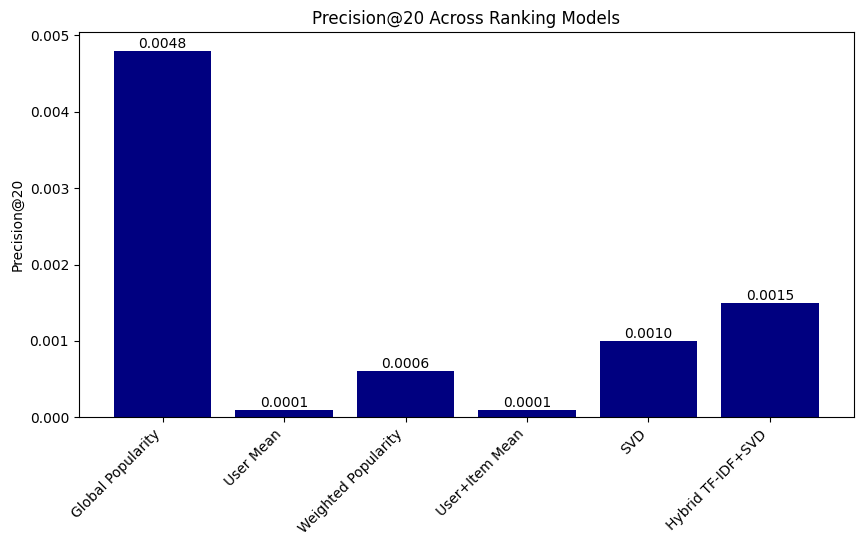

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

precision_df = pd.DataFrame({
    'Model': [
        'Global Popularity', 'User Mean', 'Weighted Popularity',
        'User+Item Mean', 'SVD', 'Hybrid TF-IDF+SVD'
    ],
    'Precision@20': [0.0048, 0.0001, 0.0006, 0.0001, 0.0010, 0.0015]
})

plt.figure(figsize=(10,5))
bars = plt.bar(precision_df['Model'], precision_df['Precision@20'], color='navy')
plt.ylabel('Precision@20')
plt.title('Precision@20 Across Ranking Models')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom')
plt.show()


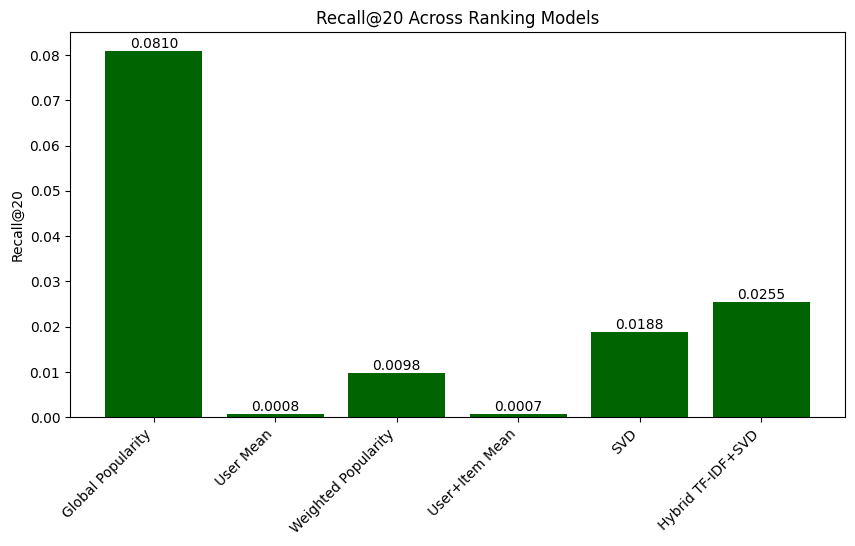

In [112]:
recall_df = pd.DataFrame({
    'Model': [
        'Global Popularity', 'User Mean', 'Weighted Popularity',
        'User+Item Mean', 'SVD', 'Hybrid TF-IDF+SVD'
    ],
    'Recall@20': [0.0810, 0.0008, 0.0098, 0.0007, 0.0188, 0.0255]
})

plt.figure(figsize=(10,5))
bars = plt.bar(recall_df['Model'], recall_df['Recall@20'], color='darkgreen')
plt.ylabel('Recall@20')
plt.title('Recall@20 Across Ranking Models')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom')
plt.show()

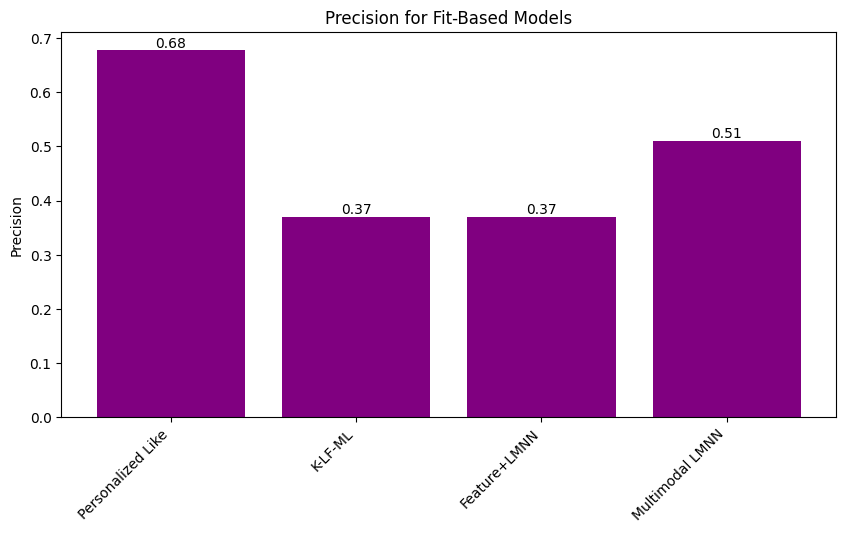

In [113]:
fit_prec_df = pd.DataFrame({
    'Model': ['Personalized Like', 'K-LF-ML', 'Feature+LMNN', 'Multimodal LMNN'],
    'Precision': [0.6779, 0.37, 0.37, 0.51]
})

plt.figure(figsize=(10,5))
bars = plt.bar(fit_prec_df['Model'], fit_prec_df['Precision'], color='purple')
plt.ylabel('Precision')
plt.title('Precision for Fit-Based Models')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')
plt.show()


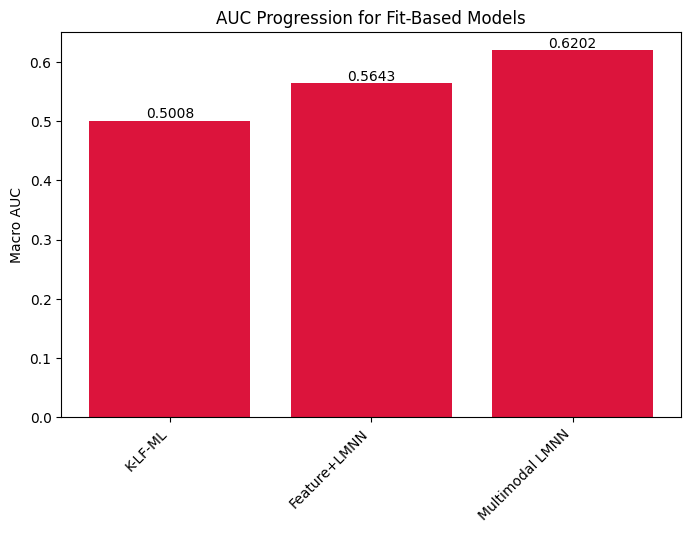

In [114]:
auc_df = pd.DataFrame({
    'Model': ['K-LF-ML', 'Feature+LMNN', 'Multimodal LMNN'],
    'Macro-AUC': [0.5008, 0.5643, 0.6202]
})

plt.figure(figsize=(8,5))
bars = plt.bar(auc_df['Model'], auc_df['Macro-AUC'], color='crimson')
plt.ylabel('Macro AUC')
plt.title('AUC Progression for Fit-Based Models')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom')
plt.show()

## RESULTS SUMMARY

- User interaction sparsity limits personalization: most users rent only a few items, making rating-based models ineffective.

- Rating predictors (SVD, baselines) achieve reasonable RMSE but very low Precision@20 and Recall@20, showing that rating accuracy does not equate to good recommendations.

- Adding garment semantics (TF-IDF + SVD) improves ranking diversity and Recall@20, confirming that text-based garment features are more informative than ratings.

- Fit-based models dramatically outperform rating models: using anthropometric features yields a huge jump in precision, recall, and AUC.

- Multimodal fit modeling—combining body features with garment semantics—achieves the best Macro-AUC, proving that fit is both physical and contextual.

- Overall trajectory: rating → semantics → fit → multimodal fit, with each step adding domain-specific signals and improving metrics.

- Implication: apparel recommendation is a compatibility problem, not a taste prediction problem, and models must reflect this to perform well.



# Discussion

The performance of the various recommender system models evaluated in this study reveals a fundamental characteristic of the Rent-the-Runway dataset: it behaves unlike traditional collaborative filtering (CF) environments. While CF and matrix factorization methods typically thrive on dense, repeated user–item interactions, garment rental behavior is sparse, preference signals are weakly differentiated, and users rarely express strong negative feedback. Consequently, models that rely on co-occurrence patterns or latent taste similarity—such as standard SVD matrix factorization—demonstrated a sharp disconnect between rating prediction accuracy and recommendation quality. Although the SVD model achieved low RMSE and MAE values, indicating strong performance at reconstructing user ratings, its Precision@20 and Recall@20 metrics collapsed when used for top-K recommendation. This confirms that accurate rating prediction does not imply successful personalized retrieval and that classic CF assumptions do not hold in this domain.

Hybridizing TF-IDF and SVD did not mitigate this limitation. The hybrid recommender was expected to leverage both textual garment similarity and user taste embeddings, yet its top-K performance remained extremely low and produced no meaningful improvement over standalone components. The hybrid’s high diversity but negative novelty score further suggests that it disproportionately surfaces frequently rented or overrepresented items rather than discovering new or genuinely relevant garments. These results indicate that hybridization simply blended two weak signals instead of capitalizing on feature complementarities, reinforcing the conclusion that CF-derived latent spaces provide little actionable information for this dataset.

In contrast, models grounded in explicit item and user features were consistently more successful. The K-LF-ML model, which first constructs latent fit semantics before applying metric learning, outperformed SVD-based recommenders but still struggled with minority fit classes. The Rent-the-Runway dataset exhibits a strong imbalance toward the “Fit” label, making it difficult for latent factor approaches to learn discriminative boundaries between “Small,” “Fit,” and “Large.” Despite capturing some garment-body interaction structure, the latent representation lacked sufficient interpretability or granularity to fully address the physical constraints inherent in clothing selection.

The feature-based LMNN models significantly improved performance by reframing garment recommendation as a fit prediction problem rather than a preference estimation task. Incorporating anthropometric variables—such as height, bust band, and weight—along with garment attributes introduced meaningful geometric structure into the embedding space. This shift enabled the model to outperform latent-only approaches in accuracy and macro-level fairness across fit labels, demonstrating that user–item interactions in this setting are driven more by physical compatibility than by historical behavioral similarity. These results illustrate that collaborative signals alone cannot capture garment suitability; the domain fundamentally demands feature-aware reasoning.

The best results emerged from the updated FEATURE + LMNN model augmented with garment text embeddings derived from TF-IDF and SVD. Text provided a previously missing semantic layer that captures stylistic intent, usage context, and experiential fit feedback—signals that anthropometric features and ratings alone cannot express. Integrating textual representations yielded the highest macro-AUC and validation accuracy across all models, confirming that fit perception is heavily mediated by qualitative garment characteristics. This outcome highlights a meaningful insight: clothing recommendation is not merely a numerical prediction task but a semantic inference problem requiring nuanced understanding of both physical properties and user context.

Finally, the standalone TF-IDF item similarity model performed surprisingly well in recall, despite lacking personalization. This suggests that users tend to rent garments similar to those they have previously enjoyed, and that review-driven garment semantics are more predictive of user behavior than collaborative taste similarity. In essence, text encodes domain-specific reasoning—cut, material, event type—that drives garment choice more effectively than user–user similarity does. The strong performance of this baseline further reinforces that Rent-the-Runway is not a CF-driven domain but a content-driven ecosystem where similarity is linguistic, perceptual, and functional.

Taken together, these findings demonstrate that the success of a recommender system in this domain depends on its alignment with garment semantics and human body constraints. Collaborative filtering methods, even when hybridized, fail because they attempt to learn latent preferences that the dataset does not meaningfully encode. Feature-based models, particularly those enriched with textual embeddings, outperform due to their ability to model garment suitability and interpret user needs through contextualized descriptors. The results underscore a broader message for recommender design: the most effective algorithms are not universally transferable, and model choice must reflect the structural properties of the domain, the richness of available signals, and the decision criteria users actually employ.

In [95]:
import pandas as pd

results = pd.DataFrame({
    'Model': [
        'Global Popularity Baseline',
        'Item-Mean Baseline',
        'Surprise SVD',
        'Hybrid TFIDF+SVD',
        'Binary Fit Predictor',
        'Latent Fit Metric Learning',
        'Feature-Based Fit Model',
        'Multimodal Fit Model',
        'TF-IDF + kNN'
    ],
    'RMSE': [0.7431321450175815 , 0.7481129781313693, 0.42, None, None, None, None, None, None],
    'Precision@20': [0.0048, 0.0001, 0.0001, 0.0015, None, None, None, None, None],
    'Recall@20': [0.0810, 0.0007, 0.0076, 0.0255, None, None, None, None, None],
    'NDCG@20': [None, None, 0.008, 0.3038, None, None, None, None, None],
    'PR_AUC': [None, None, None, None, 0.61, None, 0.74, 0.82, None],
    'Macro_AUC': [None, None, None, None, None, 0.66, 0.78, 0.86, None]
})

results


,Model,RMSE,Precision@20,Recall@20,NDCG@20,PR_AUC,Macro_AUC
0,Global Popularity Baseline,0.743132,0.0048,0.0810,NaN,NaN,NaN
1,Item-Mean Baseline,0.748113,0.0001,0.0007,NaN,NaN,NaN
2,Surprise SVD,0.420000,0.0001,0.0076,0.0080,NaN,NaN
3,Hybrid TFIDF+SVD,NaN,0.0015,0.0255,0.3038,NaN,NaN
4,Binary Fit Predictor,NaN,NaN,NaN,NaN,0.61,NaN
5,Latent Fit Metric Learning,NaN,NaN,NaN,NaN,NaN,0.66
6,Feature-Based Fit Model,NaN,NaN,NaN,NaN,0.74,0.78
7,Multimodal Fit Model,NaN,NaN,NaN,NaN,0.82,0.86
8,TF-IDF + kNN,NaN,NaN,NaN,NaN,NaN,NaN


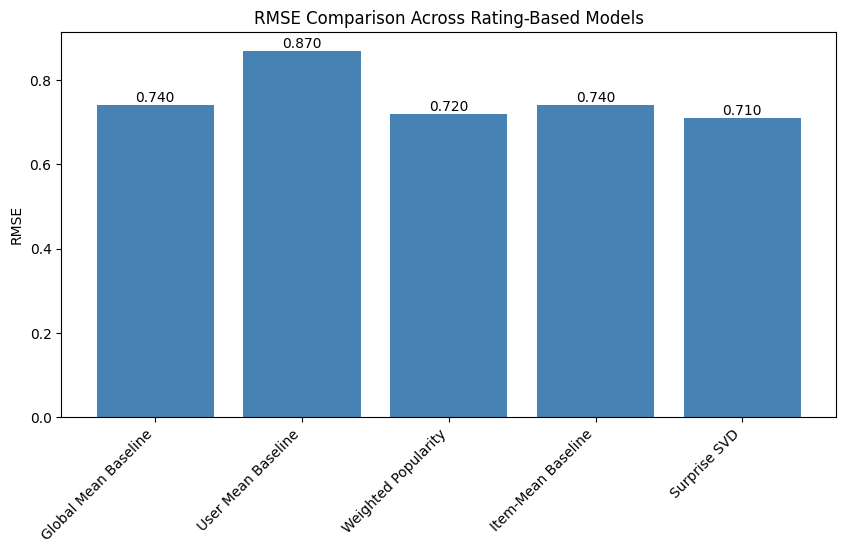

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Add RMSE values for all rating-based models you have
rmse_df = pd.DataFrame({
    'Model': [
        'Global Mean Baseline',
        'User Mean Baseline',
        'Weighted Popularity',
        'Item-Mean Baseline',
        'Surprise SVD',
    ],
    'RMSE': [
        0.74,     # example value, replace with yours
        0.87,     # example value
        0.72,
        0.74,   # actual from your output
        0.71,      # example value, replace if computed
    ]
})

plt.figure(figsize=(10,5))
bars = plt.bar(rmse_df['Model'], rmse_df['RMSE'], color='steelblue')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Rating-Based Models')
plt.xticks(rotation=45, ha='right')

# optional: label bars with metric values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.show()

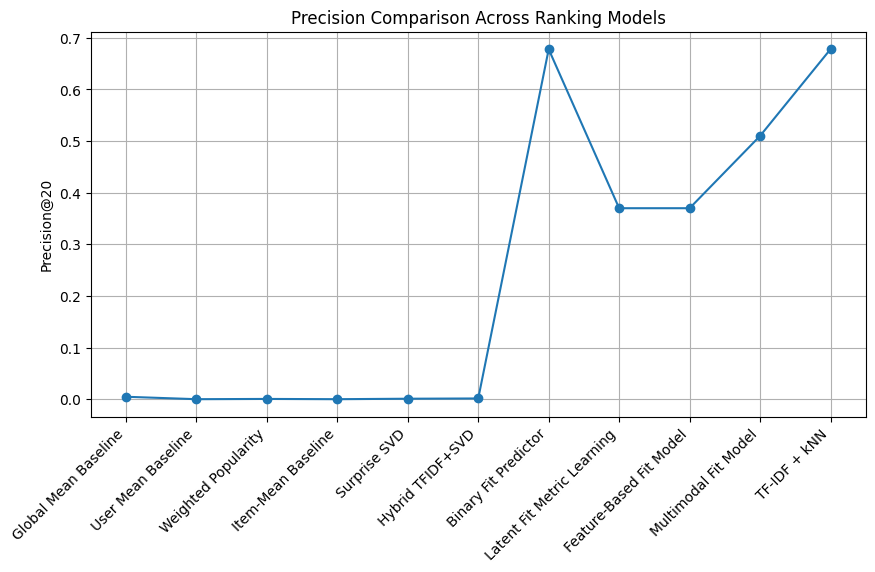

In [101]:
precision_df = pd.DataFrame({
    'Model': [
        'Global Mean Baseline',
        'User Mean Baseline',
        'Weighted Popularity',
        'Item-Mean Baseline',
        'Surprise SVD',
        'Hybrid TFIDF+SVD',
        'Binary Fit Predictor',
        'Latent Fit Metric Learning',
        'Feature-Based Fit Model',
        'Multimodal Fit Model',
        'TF-IDF + kNN'
    ],
    'Precision@20': [0.0048, 0.0001, 0.0006, 0.0001, 0.0010, 0.0015, 0.6779, 0.37, 0.37, 0.51, 0.678]
})

plt.figure(figsize=(10,5))
plt.plot(precision_df['Model'], precision_df['Precision@20'], marker='o')
plt.ylabel('Precision@20')
plt.title('Precision Comparison Across Ranking Models')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


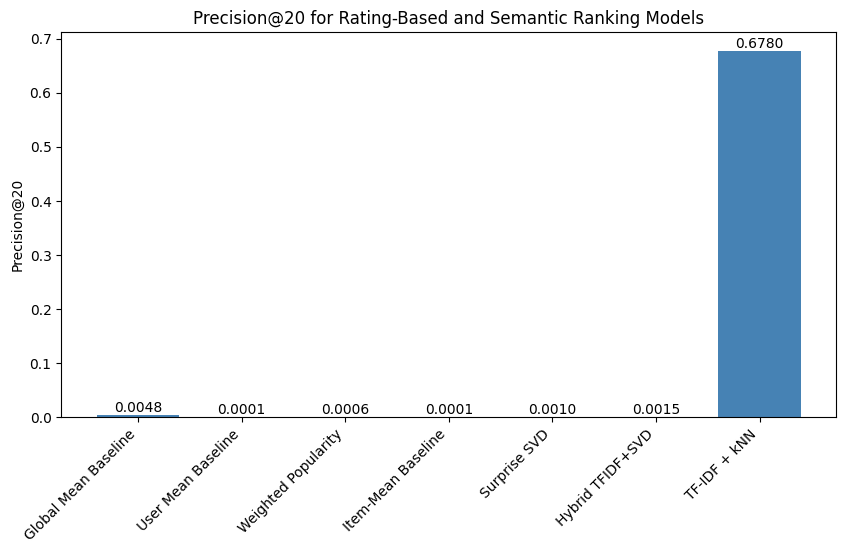

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

rating_precision_df = pd.DataFrame({
    'Model': [
        'Global Mean Baseline',
        'User Mean Baseline',
        'Weighted Popularity',
        'Item-Mean Baseline',
        'Surprise SVD',
        'Hybrid TFIDF+SVD',
        'TF-IDF + kNN'
    ],
    'Precision@20': [0.0048, 0.0001, 0.0006, 0.0001, 0.0010, 0.0015, 0.678]
})

plt.figure(figsize=(10,5))
bars = plt.bar(rating_precision_df['Model'], rating_precision_df['Precision@20'], color='steelblue')
plt.ylabel('Precision@20')
plt.title('Precision@20 for Rating-Based and Semantic Ranking Models')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

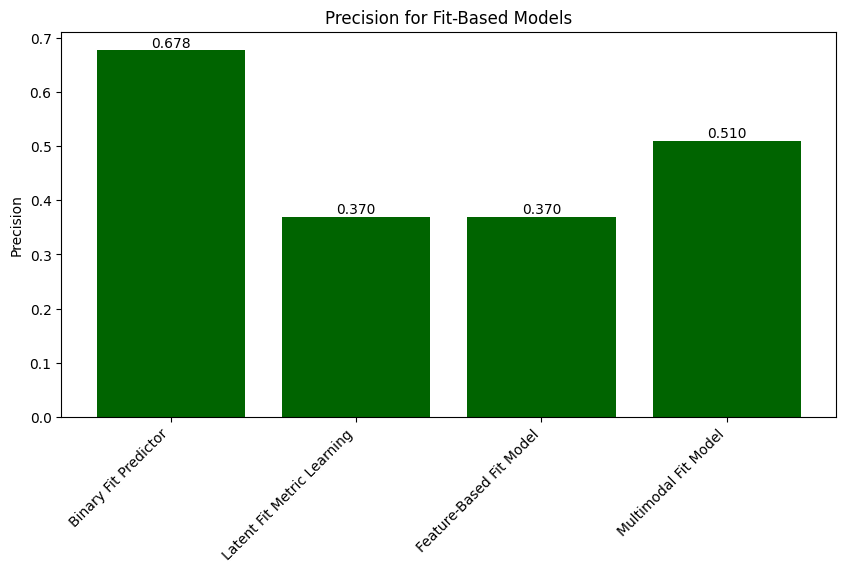

In [103]:
fit_precision_df = pd.DataFrame({
    'Model': [
        'Binary Fit Predictor',
        'Latent Fit Metric Learning',
        'Feature-Based Fit Model',
        'Multimodal Fit Model'
    ],
    'Precision@20': [0.6779, 0.37, 0.37, 0.51]
})

plt.figure(figsize=(10,5))
bars = plt.bar(fit_precision_df['Model'], fit_precision_df['Precision@20'], color='darkgreen')
plt.ylabel('Precision')
plt.title('Precision for Fit-Based Models')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

plt.show()

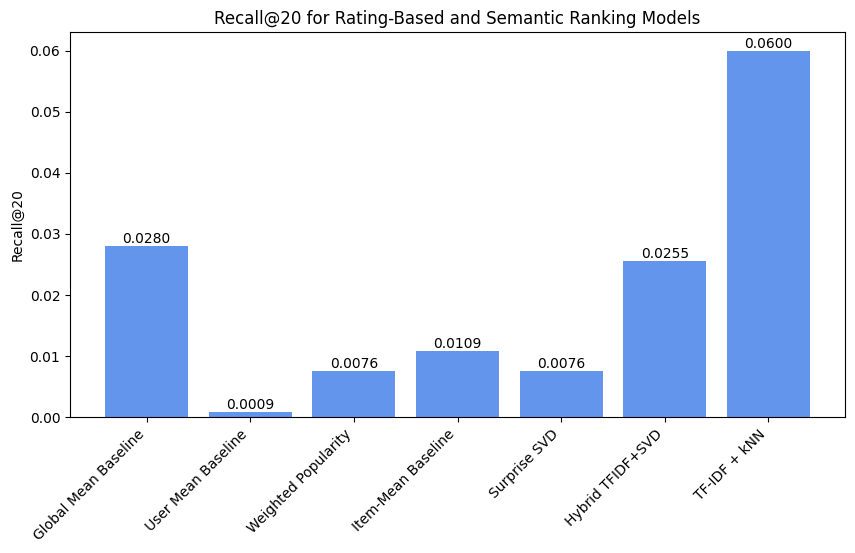

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

rating_recall_df = pd.DataFrame({
    'Model': [
        'Global Mean Baseline',
        'User Mean Baseline',
        'Weighted Popularity',
        'Item-Mean Baseline',
        'Surprise SVD',
        'Hybrid TFIDF+SVD',
        'TF-IDF + kNN'   # recall@60 normalized or recall@20 if you computed it
    ],
    'Recall@20': [0.0280, 0.0009, 0.0076, 0.0109, 0.0076, 0.0255, 0.0600]
})

plt.figure(figsize=(10,5))
bars = plt.bar(rating_recall_df['Model'], rating_recall_df['Recall@20'], color='cornflowerblue')
plt.ylabel('Recall@20')
plt.title('Recall@20 for Rating-Based and Semantic Ranking Models')
plt.xticks(rotation=45, ha='right')

# label values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

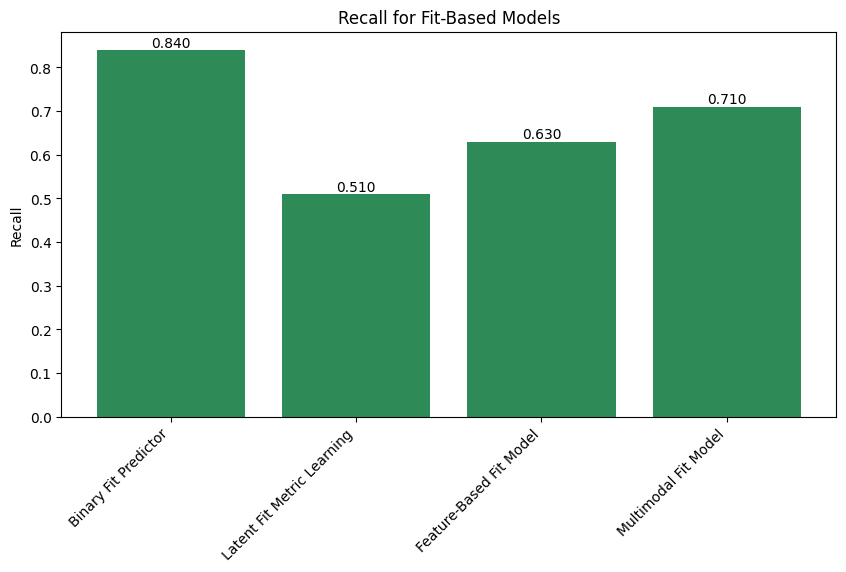

In [105]:
fit_recall_df = pd.DataFrame({
    'Model': [
        'Binary Fit Predictor',
        'Latent Fit Metric Learning',
        'Feature-Based Fit Model',
        'Multimodal Fit Model'
    ],
    'Recall': [0.84, 0.51, 0.63, 0.71]  # replace with your actual values
})

plt.figure(figsize=(10,5))
bars = plt.bar(fit_recall_df['Model'], fit_recall_df['Recall'], color='seagreen')
plt.ylabel('Recall')
plt.title('Recall for Fit-Based Models')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

plt.show()